# MCT8 Mutational Landscape Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d_aa = {'Cys': 'C', 'Asp': 'D', 'Ser': 'S', 'Gln': 'Q', 'Lys': 'K',
        'Ile': 'I', 'Pro': 'P', 'Thr': 'T', 'Phe': 'F', 'Asn': 'N',
        'Gly': 'G', 'His': 'H', 'Leu': 'L', 'Arg': 'R', 'Trp': 'W',
        'Ala': 'A', 'Val': 'V', 'Glu': 'E', 'Tyr': 'Y', 'Met': 'M',
        'Ter': 'STOP'}
aa_d = {k:v for v,k in d_aa.items()}

## Building the Mutational Landscape

In [3]:
# Build the Mutational Landscape table
# Load the features that describe MCT8 protein
mct8_features = pd.read_csv('MCT8_features_final.csv', index_col=0)
mct8_features['AAnumber'] = mct8_features.apply(lambda x: d_aa[x.Residue]+str(x.LongPosition), axis=1)
mct8_features.rename(columns={'LongPosition': 'ResNumber'}, inplace=True)
mct8_features.head()

Residue  ShortPosition  ResNumber  TMD  ICL  ECL  membrane facing  \
160     Gly             87        161  0.0  1.0  0.0              0.0   
161     Thr             88        162  0.0  1.0  0.0              0.0   
162     Ala             89        163  0.0  1.0  0.0              0.0   
163     Arg             90        164  0.0  1.0  0.0              0.0   
164     Gly             91        165  0.0  1.0  0.0              0.0   

     channel facing  Burried  \
160             0.0      0.0   
161             0.0      0.0   
162             0.0      0.0   
163             0.0      0.0   
164             0.0      0.0   

     Membrane interacting Surface area (higher score indicates stronger interaction with membrane)  \
160                                               0.00                                               
161                                               0.08                                               
162                                               0.00                                               
163                                               0.00                                               
164                                               0.00                                               

     ...  helix structure  Loop conformation  \
160  ...              0.0                0.0   
161  ...              0.0                0.0   
162  ...              0.0                0.0   
163  ...              0.0                0.0   
164  ...              0.0                0.0   

     CS vs All MCT8 (extracted with WASABI)  CS vs Mammal MCT8  \
160                                   1.402              0.590   
161                                   1.378              0.874   
162                                   2.369              2.979   
163                                   2.470              0.173   
164                                   2.453              0.054   

     CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)  \
160                                              1.652                                                               
161                                              1.782                                                               
162                                              1.000                                                               
163                                              2.298                                                               
164                                              2.000                                                               

     CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)  \
160                                              1.294                                                       
161                                              1.757                                                       
162                                              1.377                                                       
163                                              1.644                                                       
164                                              2.344                                                       

     AAnumber  dCOM_AF_OW  dCOM_HM_IW  dCOM_HM_OW  
160      G161   40.991276   43.974030   24.781752  
161      T162   38.006656   41.568072   24.184929  
162      A163   35.161901   39.152801   26.777752  
163      R164   34.684597   35.602310   29.092915  
164      G165   31.091276   33.306259   30.381777  

[5 rows x 34 columns]

In [4]:
mutational_landscape = pd.DataFrame()

protein_consequence = []
for aa in mct8_features.AAnumber.tolist():
    for x in list(d_aa.values())[:-1]:
        if x != aa[0]:
            protein_consequence.append(aa+x)
        
mutational_landscape['Variant'] = protein_consequence
mutational_landscape['ResNumber'] = mutational_landscape['Variant'].str.extract('(\d+)').astype(int)

mutational_landscape = mutational_landscape.merge(mct8_features, on='ResNumber', how='left')
mutational_landscape.head()

Variant  ResNumber Residue  ShortPosition  TMD  ICL  ECL  membrane facing  \
0   G161C        161     Gly             87  0.0  1.0  0.0              0.0   
1   G161D        161     Gly             87  0.0  1.0  0.0              0.0   
2   G161S        161     Gly             87  0.0  1.0  0.0              0.0   
3   G161Q        161     Gly             87  0.0  1.0  0.0              0.0   
4   G161K        161     Gly             87  0.0  1.0  0.0              0.0   

   channel facing  Burried  ...  helix structure  Loop conformation  \
0             0.0      0.0  ...              0.0                0.0   
1             0.0      0.0  ...              0.0                0.0   
2             0.0      0.0  ...              0.0                0.0   
3             0.0      0.0  ...              0.0                0.0   
4             0.0      0.0  ...              0.0                0.0   

   CS vs All MCT8 (extracted with WASABI)  CS vs Mammal MCT8  \
0                                   1.402               0.59   
1                                   1.402               0.59   
2                                   1.402               0.59   
3                                   1.402               0.59   
4                                   1.402               0.59   

   CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)  \
0                                              1.652                                                               
1                                              1.652                                                               
2                                              1.652                                                               
3                                              1.652                                                               
4                                              1.652                                                               

   CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)  \
0                                              1.294                                                       
1                                              1.294                                                       
2                                              1.294                                                       
3                                              1.294                                                       
4                                              1.294                                                       

   AAnumber  dCOM_AF_OW  dCOM_HM_IW  dCOM_HM_OW  
0      G161   40.991276    43.97403   24.781752  
1      G161   40.991276    43.97403   24.781752  
2      G161   40.991276    43.97403   24.781752  
3      G161   40.991276    43.97403   24.781752  
4      G161   40.991276    43.97403   24.781752  

[5 rows x 35 columns]

In [5]:
# Load the tables with amino acid scores
AAindex_all = pd.read_csv('AAindex_all.csv', index_col=0)
AAindex_all.reset_index(inplace=True)
AAindex_all.rename(columns={'index':'AA change'}, inplace=True)

mutational_landscape['AA from'] = mutational_landscape['Variant'].str[0]
mutational_landscape['AA to'] = mutational_landscape['Variant'].str[-1]
mutational_landscape['AA change'] = mutational_landscape['AA from']+'-'+mutational_landscape['AA to']

mutational_landscape = mutational_landscape.merge(AAindex_all, on=['AA change'])
mutational_landscape.head()

Variant  ResNumber Residue  ShortPosition  TMD  ICL  ECL  membrane facing  \
0   G161C        161     Gly             87  0.0  1.0  0.0              0.0   
1   G165C        165     Gly             91  0.0  1.0  0.0              0.0   
2   G171C        171     Gly             97  0.0  1.0  0.0              0.0   
3   G172C        172     Gly             98  0.0  1.0  0.0              0.0   
4   G174C        174     Gly            100  1.0  0.0  0.0              0.0   

   channel facing  Burried  ...  KOSJ950102  KOSJ950111  OVEJ920104  \
0             0.0      0.0  ...         0.1         0.6         0.0   
1             0.0      0.0  ...         0.1         0.6         0.0   
2             0.0      0.0  ...         0.1         0.6         0.0   
3             0.0      0.0  ...         0.1         0.6         0.0   
4             0.0      1.0  ...         0.1         0.6         0.0   

   KOLA920101  HENS920103  LUTR910104  WEIL970102  GIAG010101  DOSZ010101  \
0         0.0        -6.0         3.0         3.0         0.3        30.7   
1         0.0        -6.0         3.0         3.0         0.3        30.7   
2         0.0        -6.0         3.0         3.0         0.3        30.7   
3         0.0        -6.0         3.0         3.0         0.3        30.7   
4         0.0        -6.0         3.0         3.0         0.3        30.7   

   KOSJ950114  
0         0.3  
1         0.3  
2         0.3  
3         0.3  
4         0.3  

[5 rows x 129 columns]

In [6]:
foldx_AF = pd.read_csv('FoldXMatrix-MCT8.csv', index_col=0, sep='\t')

for i in mutational_landscape.index:
    variant = mutational_landscape.loc[i, 'Variant']
    mutational_landscape.loc[i, 'FoldX_ddG_AF_OW'] = foldx_AF.loc[variant[:-1], variant[-1]]  

In [7]:
foldx_outward = pd.read_csv('FoldXMatrix-MCT8outward.csv', index_col=0, sep='\t')

for i in mutational_landscape.index:
    variant = mutational_landscape.loc[i, 'Variant']
    mutational_landscape.loc[i, 'FoldX_ddG_HM_OW'] = foldx_outward.loc[variant[:-1], variant[-1]]   

In [8]:
foldx_inward = pd.read_csv('FoldXMatrix-MCT8inward.csv', index_col=0, sep='\t')

for i in mutational_landscape.index:
    variant = mutational_landscape.loc[i, 'Variant']
    mutational_landscape.loc[i, 'FoldX_ddG_HM_IW'] = foldx_inward.loc[variant[:-1], variant[-1]]   

In [9]:
mutational_landscape.sort_values(by='ResNumber', inplace=True)
mutational_landscape

Variant  ResNumber Residue  ShortPosition  TMD  ICL  ECL  \
0      G161C        161     Gly             87  0.0  1.0  0.0   
672    G161E        161     Gly             87  0.0  1.0  0.0   
630    G161V        161     Gly             87  0.0  1.0  0.0   
588    G161A        161     Gly             87  0.0  1.0  0.0   
546    G161W        161     Gly             87  0.0  1.0  0.0   
...      ...        ...     ...            ...  ...  ...  ...   
7802   K590I        590     Lys            516  0.0  1.0  0.0   
7858   K590N        590     Lys            516  0.0  1.0  0.0   
7956   K590V        590     Lys            516  0.0  1.0  0.0   
7816   K590P        590     Lys            516  0.0  1.0  0.0   
7844   K590F        590     Lys            516  0.0  1.0  0.0   

      membrane facing  channel facing  Burried  ...  KOLA920101  HENS920103  \
0                 0.0             0.0      0.0  ...         0.0        -6.0   
672               0.0             0.0      0.0  ...         0.0        -4.0   
630               0.0             0.0      0.0  ...         0.0        -6.0   
588               0.0             0.0      0.0  ...         0.0         0.0   
546               0.0             0.0      0.0  ...         0.0        -6.0   
...               ...             ...      ...  ...         ...         ...   
7802              0.0             0.0      0.0  ...         0.0        -5.0   
7858              0.0             0.0      0.0  ...         0.0         0.0   
7956              0.0             0.0      0.0  ...         0.0        -4.0   
7816              0.0             0.0      0.0  ...         0.0        -2.0   
7844              0.0             0.0      0.0  ...         5.0        -5.0   

      LUTR910104  WEIL970102  GIAG010101  DOSZ010101  KOSJ950114  \
0            3.0         3.0         0.3        30.7         0.3   
672          8.0         0.0         0.0       -10.8         0.4   
630        -10.0         1.0         0.4        11.1         0.4   
588          5.0        -1.0        -1.8         7.3         3.6   
546        -57.0         0.0        -0.1         8.4         0.2   
...          ...         ...         ...         ...         ...   
7802        -1.0         1.0         0.6         8.5         1.6   
7858         6.0         0.0         2.4        -4.4         1.6   
7956        -4.0        -1.0         1.1        10.9         3.7   
7816         3.0         1.0         0.1        -8.2         0.4   
7844       -23.0         1.0        -0.7         7.0         0.6   

      FoldX_ddG_AF_OW  FoldX_ddG_HM_OW  FoldX_ddG_HM_IW  
0                 3.5              2.6              0.1  
672               3.5              3.6              0.1  
630               5.0              4.3              0.3  
588               3.5              0.7              0.1  
546               3.4              5.9              0.1  
...               ...              ...              ...  
7802              0.3              0.6              0.4  
7858              0.3              0.5              0.4  
7956              0.7              0.7              0.6  
7816              3.2              1.1              2.8  
7844              0.2              0.4             -1.5  

[8170 rows x 132 columns]

In [10]:
ddg_homologymodel_outward = pd.read_csv('MCT8_ddG_outward.csv')
ddg_homologymodel_outward['AA_change'] = ddg_homologymodel_outward.apply(
                                         lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                         axis=1)
ddg_homologymodel_outward.rename(columns={'ddG_pred':'MAESTRO_ddG_HM_OW', 'c_pred': 'c_HM_OW'}, inplace=True)
ddg_homologymodel_outward = ddg_homologymodel_outward[['AA_change', 'MAESTRO_ddG_HM_OW', 'c_HM_OW']]
ddg_homologymodel_outward['MAESTRO_ddG_HM_OW'] = ddg_homologymodel_outward['MAESTRO_ddG_HM_OW'].astype(float)
ddg_homologymodel_outward['c_HM_OW'] = ddg_homologymodel_outward['c_HM_OW'].astype(float)
ddg_homologymodel_outward.drop_duplicates(subset='AA_change', keep='first', inplace=True)

In [11]:
ddg_homologymodel_inward = pd.read_csv('MCT8_ddG_inward.csv')
ddg_homologymodel_inward['AA_change'] = ddg_homologymodel_inward.apply(
                                        lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                        axis=1)
ddg_homologymodel_inward.rename(columns={'ddG_pred':'MAESTRO_ddG_HM_IW', 'c_pred': 'c_HM_IW'}, inplace=True)
ddg_homologymodel_inward = ddg_homologymodel_inward[['AA_change', 'MAESTRO_ddG_HM_IW', 'c_HM_IW']]
ddg_homologymodel_inward.drop_duplicates(subset='AA_change', keep='first', inplace=True)

In [12]:
ddg_alphafold_outward = pd.read_csv('MCT8_ddG_alphafold.csv')
ddg_alphafold_outward['AA_change'] = ddg_alphafold_outward.apply(
                                     lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                     axis=1)
ddg_alphafold_outward.rename(columns={'ddG_pred':'MAESTRO_ddG_AF_OW', 'c_pred': 'c_AF_OW'}, inplace=True)
ddg_alphafold_outward = ddg_alphafold_outward[['AA_change', 'MAESTRO_ddG_AF_OW', 'c_AF_OW']]
ddg_alphafold_outward.drop_duplicates(subset='AA_change', keep='first', inplace=True)

In [13]:
mct8_ddg = ddg_homologymodel_outward
for i in mct8_ddg.AA_change.tolist():
    #print(i)
    ddg_inward = ddg_homologymodel_inward.loc[ddg_homologymodel_inward.AA_change == i, 'MAESTRO_ddG_HM_IW']
    c_inward = ddg_homologymodel_inward.loc[ddg_homologymodel_inward.AA_change == i, 'c_HM_IW']
    ddg_alphafold = ddg_alphafold_outward.loc[ddg_alphafold_outward.AA_change == i, 'MAESTRO_ddG_AF_OW']
    c_alphafold = ddg_alphafold_outward.loc[ddg_alphafold_outward.AA_change == i, 'c_AF_OW']
    if not ddg_inward.empty:
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'MAESTRO_ddG_HM_IW'] = ddg_inward.astype(float).values[0]
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'c_HM_IW'] = c_inward.astype(float).values[0]
    if not ddg_alphafold.empty:
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'MAESTRO_ddG_AF_OW'] = ddg_alphafold.astype(float).values[0]
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'c_AF_OW'] = c_alphafold.astype(float).values[0]

In [14]:
mct8_ddg = mct8_ddg[['AA_change', 'MAESTRO_ddG_HM_OW', 'MAESTRO_ddG_HM_IW', 'MAESTRO_ddG_AF_OW']]
mct8_ddg['Variant'] = mct8_ddg.apply(lambda x: d_aa[x['AA_change'][:3]]+str(int(x['AA_change'][3:-3])+74)+
                                     d_aa[x['AA_change'][-3:]], axis=1)

/tmp/ipykernel_5021/909751661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mct8_ddg['Variant'] = mct8_ddg.apply(lambda x: d_aa[x['AA_change'][:3]]+str(int(x['AA_change'][3:-3])+74)+


In [15]:
mct8_ddg

AA_change  MAESTRO_ddG_HM_OW  MAESTRO_ddG_HM_IW  MAESTRO_ddG_AF_OW  \
0      Thr85Ala              0.823                NaN              1.282   
1      Thr85Val              0.408                NaN              1.154   
2      Thr85Tyr              0.091                NaN              0.531   
3      Thr85Trp              0.173                NaN              0.351   
4      Thr85Ser              0.373                NaN              0.969   
...         ...                ...                ...                ...   
8450  Leu529Glu             -0.577             -0.577              0.679   
8451  Leu529Cys              0.157              0.157              1.149   
8452  Leu529Asp             -0.559             -0.559              0.726   
8453  Leu529Asn             -0.515             -0.515              0.808   
8454  Leu529Arg              0.615              0.615             -0.027   

     Variant  
0      T159A  
1      T159V  
2      T159Y  
3      T159W  
4      T159S  
...      ...  
8450   L603E  
8451   L603C  
8452   L603D  
8453   L603N  
8454   L603R  

[8455 rows x 5 columns]

In [16]:
# Merge the ddG calculations with the variants dataset
mutational_landscape = mutational_landscape.merge(mct8_ddg, on=['Variant'])
mutational_landscape.head()

Variant  ResNumber Residue  ShortPosition  TMD  ICL  ECL  membrane facing  \
0   G161C        161     Gly             87  0.0  1.0  0.0              0.0   
1   G161E        161     Gly             87  0.0  1.0  0.0              0.0   
2   G161V        161     Gly             87  0.0  1.0  0.0              0.0   
3   G161A        161     Gly             87  0.0  1.0  0.0              0.0   
4   G161W        161     Gly             87  0.0  1.0  0.0              0.0   

   channel facing  Burried  ...  GIAG010101  DOSZ010101  KOSJ950114  \
0             0.0      0.0  ...         0.3        30.7         0.3   
1             0.0      0.0  ...         0.0       -10.8         0.4   
2             0.0      0.0  ...         0.4        11.1         0.4   
3             0.0      0.0  ...        -1.8         7.3         3.6   
4             0.0      0.0  ...        -0.1         8.4         0.2   

   FoldX_ddG_AF_OW  FoldX_ddG_HM_OW  FoldX_ddG_HM_IW  AA_change  \
0              3.5              2.6              0.1   Gly87Cys   
1              3.5              3.6              0.1   Gly87Glu   
2              5.0              4.3              0.3   Gly87Val   
3              3.5              0.7              0.1   Gly87Ala   
4              3.4              5.9              0.1   Gly87Trp   

   MAESTRO_ddG_HM_OW  MAESTRO_ddG_HM_IW  MAESTRO_ddG_AF_OW  
0             -0.471           0.263458              0.050  
1             -0.939           0.051636             -0.253  
2             -0.388           0.305968              0.203  
3             -0.464           0.720371              0.239  
4             -0.505           0.027806             -0.008  

[5 rows x 136 columns]

In [17]:
for i in mutational_landscape.columns:
    print(i)

Variant
ResNumber
Residue
ShortPosition
TMD
ICL
ECL
membrane facing
channel facing
Burried
Membrane interacting Surface area (higher score indicates stronger interaction with membrane)
Solvent accessible Surface area (A2) (lower score indicates residue is burried)
Substrate channel Surface area (higher score indicates residue is facing substrate channel)
Substrate interaction surface (higher score indicates stronger substrate interation)
Substrate interaction Outward-open
Mean distance to substrate at SBC (lower score indicates shorter distance)
RMSD
Solvent accessible Surface area (A2)
Membrane interacting Surface area
Substrate channel Surface area
Substrate interaction surface
Substrate interaction Inward-open
substrate interaction
orientation of substrate interacting res
TMD binder
helix structure
Loop conformation
CS vs All MCT8 (extracted with WASABI)
CS vs Mammal MCT8
CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)
CS

In [18]:
# Drop some columns that aren't relevant for the EDA

mutational_landscape = mutational_landscape.drop(columns=['AA from', 'AA to', 'Residue', 'AA change', 
                                                          'AA_change', 'ShortPosition', 'AAnumber',                                                           
                                                          'Substrate interaction Outward-open', 
                                                          'Substrate interaction Inward-open'])
mutational_landscape.rename(columns={'membrane facing': 'MembraneFacing',
                                     'channel facing': 'ChannelFacing',
                                     'Burried': 'Buried',
                                     'Membrane interacting Surface area (higher score indicates stronger interaction with membrane)': 'MISA_OW',
                                     'Solvent accessible Surface area (A2) (lower score indicates residue is burried)': 'SASA_OW',
                                     'Substrate channel Surface area (higher score indicates residue is facing substrate channel)': 'SCSA_OW',
                                     'Substrate interaction surface (higher score indicates stronger substrate interation)': 'SIS_OW',
                                     'Mean distance to substrate at SBC (lower score indicates shorter distance)': 'MDS_OW',
                                     'Solvent accessible Surface area (A2)': 'SASA_IW',
                                     'Membrane interacting Surface area': 'MISA_IW',
                                     'Substrate channel Surface area': 'SCSA_IW',
                                     'Substrate interaction surface': 'SIS_IW',
                                     'substrate interaction': 'SubstrateInteraction',
                                     'orientation of substrate interacting res': 'OSIR',
                                     'TMD binder': 'TMDbinder',
                                     'helix structure': 'HelixStructure',
                                     'Loop conformation': 'LoopConformation',
                                     'CS vs All MCT8 (extracted with WASABI)': 'CS1',
                                     'CS vs Mammal MCT8': 'CS2',
                                     'CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)': 'CS3',
                                     'CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)': 'CS4',                          
                                    }, inplace=True)

mutational_landscape.set_index('Variant', inplace=True, drop=True)
mutational_landscape.head()

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  WEIL970102  GIAG010101  DOSZ010101  \
Variant                             ...                                       
G161C        0.0    33.86      0.0  ...         3.0         0.3        30.7   
G161E        0.0    33.86      0.0  ...         0.0         0.0       -10.8   
G161V        0.0    33.86      0.0  ...         1.0         0.4        11.1   
G161A        0.0    33.86      0.0  ...        -1.0        -1.8         7.3   
G161W        0.0    33.86      0.0  ...         0.0        -0.1         8.4   

         KOSJ950114  FoldX_ddG_AF_OW  FoldX_ddG_HM_OW  FoldX_ddG_HM_IW  \
Variant                                                                  
G161C           0.3              3.5              2.6              0.1   
G161E           0.4              3.5              3.6              0.1   
G161V           0.4              5.0              4.3              0.3   
G161A           3.6              3.5              0.7              0.1   
G161W           0.2              3.4              5.9              0.1   

         MAESTRO_ddG_HM_OW  MAESTRO_ddG_HM_IW  MAESTRO_ddG_AF_OW  
Variant                                                           
G161C               -0.471           0.263458              0.050  
G161E               -0.939           0.051636             -0.253  
G161V               -0.388           0.305968              0.203  
G161A               -0.464           0.720371              0.239  
G161W               -0.505           0.027806             -0.008  

[5 rows x 126 columns]

In [19]:
# Feature Engineering
# Mean value for some structural parameters
mutational_landscape['MISA'] = mutational_landscape.apply(lambda x: x[['MISA_OW', 'MISA_IW']].mean(), axis=1)
mutational_landscape['SASA'] = mutational_landscape.apply(lambda x: x[['SASA_OW', 'SASA_IW']].mean(), axis=1)
mutational_landscape['SCSA'] = mutational_landscape.apply(lambda x: x[['SCSA_OW', 'SCSA_IW']].mean(), axis=1)
mutational_landscape['SIS'] = mutational_landscape.apply(lambda x: x[['SIS_OW', 'SIS_IW']].mean(), axis=1)
mutational_landscape['MAESTRO_ddG'] = mutational_landscape.apply(lambda x: x[['MAESTRO_ddG_HM_OW', 'MAESTRO_ddG_HM_IW', 'MAESTRO_ddG_AF_OW'                                           
                                                                 ]].mean(), axis=1)
mutational_landscape['FoldX_ddG'] = mutational_landscape.apply(lambda x: x[['FoldX_ddG_HM_OW', 'FoldX_ddG_HM_IW', 'FoldX_ddG_AF_OW'                                           
                                                             ]].mean(), axis=1)
mutational_landscape['dCOM'] = mutational_landscape.apply(lambda x: x[['dCOM_HM_OW', 'dCOM_HM_IW', 'dCOM_AF_OW'                                           
                                                        ]].mean(), axis=1)

mutational_landscape.head()

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  MAESTRO_ddG_HM_OW  MAESTRO_ddG_HM_IW  \
Variant                             ...                                         
G161C        0.0    33.86      0.0  ...             -0.471           0.263458   
G161E        0.0    33.86      0.0  ...             -0.939           0.051636   
G161V        0.0    33.86      0.0  ...             -0.388           0.305968   
G161A        0.0    33.86      0.0  ...             -0.464           0.720371   
G161W        0.0    33.86      0.0  ...             -0.505           0.027806   

         MAESTRO_ddG_AF_OW    MISA    SASA  SCSA  SIS  MAESTRO_ddG  FoldX_ddG  \
Variant                                                                         
G161C                0.050  20.885  37.055   0.0  0.0    -0.052514   2.066667   
G161E               -0.253  20.885  37.055   0.0  0.0    -0.380121   2.400000   
G161V                0.203  20.885  37.055   0.0  0.0     0.040323   3.200000   
G161A                0.239  20.885  37.055   0.0  0.0     0.165124   1.433333   
G161W               -0.008  20.885  37.055   0.0  0.0    -0.161731   3.133333   

              dCOM  
Variant             
G161C    36.582353  
G161E    36.582353  
G161V    36.582353  
G161A    36.582353  
G161W    36.582353  

[5 rows x 133 columns]

In [20]:
mutational_landscape.to_csv('MCT8_mutationallandscape_seed.csv')

---

In [21]:
mutational_landscape = pd.read_csv('MCT8_mutationallandscape_seed.csv')
mutational_landscape.head()

Variant  ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
0   G161C        161  0.0  1.0  0.0             0.0            0.0     0.0   
1   G161E        161  0.0  1.0  0.0             0.0            0.0     0.0   
2   G161V        161  0.0  1.0  0.0             0.0            0.0     0.0   
3   G161A        161  0.0  1.0  0.0             0.0            0.0     0.0   
4   G161W        161  0.0  1.0  0.0             0.0            0.0     0.0   

   MISA_OW  SASA_OW  ...  MAESTRO_ddG_HM_OW  MAESTRO_ddG_HM_IW  \
0      0.0    33.86  ...             -0.471           0.263458   
1      0.0    33.86  ...             -0.939           0.051636   
2      0.0    33.86  ...             -0.388           0.305968   
3      0.0    33.86  ...             -0.464           0.720371   
4      0.0    33.86  ...             -0.505           0.027806   

   MAESTRO_ddG_AF_OW    MISA    SASA  SCSA  SIS  MAESTRO_ddG  FoldX_ddG  \
0              0.050  20.885  37.055   0.0  0.0    -0.052514   2.066667   
1             -0.253  20.885  37.055   0.0  0.0    -0.380121   2.400000   
2              0.203  20.885  37.055   0.0  0.0     0.040323   3.200000   
3              0.239  20.885  37.055   0.0  0.0     0.165124   1.433333   
4             -0.008  20.885  37.055   0.0  0.0    -0.161731   3.133333   

        dCOM  
0  36.582353  
1  36.582353  
2  36.582353  
3  36.582353  
4  36.582353  

[5 rows x 134 columns]

In [22]:
# Including evo_indices 

eve_scores_init = pd.read_csv('MOT8_HUMAN_b05_20000_samples.csv', index_col=0)
eve_scores_init.rename(columns={'mutations':'Variant', 'evol_indices':'evol_indices_init'}, inplace=True)
eve_scores_init = eve_scores_init[eve_scores_init.Variant!='wt']

eve_scores_mean = pd.read_csv('MOT8_HUMAN_scores_from_10_models.csv')
eve_scores_mean.rename(columns={'mutations':'Variant', 'mean':'evol_indices_mean'}, inplace=True)
eve_scores_mean = eve_scores_mean[eve_scores_mean.Variant!='wt']
eve_scores_mean = eve_scores_mean[['Variant', 'evol_indices_mean']]

mutational_landscape = mutational_landscape.merge(eve_scores_init, on='Variant', how='left')
mutational_landscape = mutational_landscape.merge(eve_scores_mean, on='Variant', how='left')
mutational_landscape.set_index('Variant', inplace=True)
mutational_landscape.to_csv('MCT8_mutationallandscape_seed.csv')

---

## First Step Classifier

In [23]:
# Defining two different Classes
mct8 = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
mct8.set_index('AA_change', inplace=True)

mct8.loc[(mct8['Activity'] > 50), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 50, 'ClinSig'] = 1

In [24]:
# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

categorical_features = ['TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing', 'Buried',
                        'SubstrateInteraction', 'OSIR', 'TMDbinder', 'HelixStructure', 'LoopConformation']
numerical_features = [x for x in X.columns if x not in categorical_features]
X.head()

TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  MISA_OW  \
AA_change                                                                  
Pro169Ala  0.0  1.0  0.0             0.0            0.0     0.0     0.00   
Pro233Ala  1.0  0.0  0.0             1.0            0.0     0.0    16.57   
Pro289Ala  1.0  0.0  0.0             0.0            0.0     1.0     0.00   
Pro321Ala  1.0  0.0  0.0             0.0            0.0     1.0     0.00   
Pro356Ala  0.0  1.0  0.0             0.0            0.0     0.0     0.08   

           SASA_OW  SCSA_OW  SIS_OW  ...  FoldX_ddG_HM_IW    MISA    SASA  \
AA_change                            ...                                    
Pro169Ala    36.39      0.0     0.0  ...              1.7   0.045  38.905   
Pro233Ala     0.00      0.0     0.0  ...              2.8  17.645  16.210   
Pro289Ala     9.02      0.0     0.0  ...              2.3   0.000   4.510   
Pro321Ala     4.54      0.0     0.0  ...              2.9   0.000   2.270   
Pro356Ala    56.21      0.0     0.0  ...              1.2   0.040  61.120   

           SCSA  SIS  MAESTRO_ddG  FoldX_ddG       dCOM  evol_indices_init  \
AA_change                                                                    
Pro169Ala  0.00  0.0     0.583984   2.033333  26.782026           4.484985   
Pro233Ala  8.43  0.0    -0.502685   2.666667  14.001623           5.286438   
Pro289Ala  0.00  0.0    -0.469728   2.466667  13.171551           5.843872   
Pro321Ala  0.00  0.0    -0.382626   2.800000  18.156483           5.011963   
Pro356Ala  0.00  0.0     0.503667   1.400000  23.227317           6.271729   

           evol_indices_mean  
AA_change                     
Pro169Ala           4.504437  
Pro233Ala           5.533997  
Pro289Ala           5.583874  
Pro321Ala           5.110223  
Pro356Ala           6.504669  

[5 rows x 134 columns]

In [25]:
selected_features_1 = ['MDS_OW', 'GEOD900101', 'DAYM780301', 'LINK010101', 'FoldX_ddG_AF_OW', 'evol_indices_mean',
                       'TMD', 'ICL', 'ECL']

# DISCARDING NON-INFORMATIVE FEATURES
# Defining the datasets
X = mct8.loc[:, selected_features_1]
y = mct8['ClinSig']

# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

categorical_features_ = [x for x in X.columns if x in categorical_features]
numerical_features_ = [x for x in X.columns if x in numerical_features]

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ])

preprocessor_1 = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numerical_features_)
   ,('categorical', categorical_transformer, categorical_features_)
]) 

X = preprocessor_1.fit_transform(X)

In [26]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(fit_intercept=False, C=1, 
                                  l1_ratio=0, penalty='none', 
                                  solver='saga').fit(X, y)

/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [27]:
mutational_landscape = pd.read_csv('MCT8_mutationallandscape_seed.csv', index_col=0)

mutational_landscape_1 = mutational_landscape.loc[:, selected_features_1]

mutational_landscape_1 = preprocessor_1.transform(mutational_landscape_1)

prediction_1 = classifier_1.predict(mutational_landscape_1)
probas_1 = classifier_1.predict_proba(mutational_landscape_1)

In [28]:
mutational_landscape.columns

Index(['ResNumber', 'TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing',
       'Buried', 'MISA_OW', 'SASA_OW', 'SCSA_OW',
       ...
       'MAESTRO_ddG_AF_OW', 'MISA', 'SASA', 'SCSA', 'SIS', 'MAESTRO_ddG',
       'FoldX_ddG', 'dCOM', 'evol_indices_init', 'evol_indices_mean'],
      dtype='object', length=135)

In [29]:
mutational_landscape_1

array([[ 1.32958255,  0.1470954 , -1.16187025, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.32958255, -1.03955659,  0.39449548, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.32958255,  0.1470954 , -0.1242931 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.36864883, -2.81953459, -0.64308167, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.36864883, -2.81953459, -0.1242931 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.36864883, -4.00618659, -2.1994474 , ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
mutational_landscape

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   
...            ...  ...  ...  ...             ...            ...     ...   
K590I          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590N          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590V          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590P          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590F          590  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  MAESTRO_ddG_AF_OW    MISA    SASA  \
Variant                             ...                                      
G161C        0.0    33.86      0.0  ...              0.050  20.885  37.055   
G161E        0.0    33.86      0.0  ...             -0.253  20.885  37.055   
G161V        0.0    33.86      0.0  ...              0.203  20.885  37.055   
G161A        0.0    33.86      0.0  ...              0.239  20.885  37.055   
G161W        0.0    33.86      0.0  ...             -0.008  20.885  37.055   
...          ...      ...      ...  ...                ...     ...     ...   
K590I        0.0    92.00      0.0  ...              0.140   0.000  80.465   
K590N        0.0    92.00      0.0  ...              0.018   0.000  80.465   
K590V        0.0    92.00      0.0  ...              0.180   0.000  80.465   
K590P        0.0    92.00      0.0  ...              0.186   0.000  80.465   
K590F        0.0    92.00      0.0  ...              0.174   0.000  80.465   

         SCSA  SIS  MAESTRO_ddG  FoldX_ddG       dCOM  evol_indices_init  \
Variant                                                                    
G161C     0.0  0.0    -0.052514   2.066667  36.582353                NaN   
G161E     0.0  0.0    -0.380121   2.400000  36.582353                NaN   
G161V     0.0  0.0     0.040323   3.200000  36.582353                NaN   
G161A     0.0  0.0     0.165124   1.433333  36.582353                NaN   
G161W     0.0  0.0    -0.161731   3.133333  36.582353                NaN   
...       ...  ...          ...        ...        ...                ...   
K590I     0.0  0.0     0.193525   0.433333  37.246300                NaN   
K590N     0.0  0.0     0.190149   0.400000  37.246300                NaN   
K590V     0.0  0.0     0.223162   0.666667  37.246300                NaN   
K590P     0.0  0.0     0.468667   2.366667  37.246300                NaN   
K590F     0.0  0.0     0.203310  -0.300000  37.246300                NaN   

         evol_indices_mean  
Variant                     
G161C                  NaN  
G161E                  NaN  
G161V                  NaN  
G161A                  NaN  
G161W                  NaN  
...                    ...  
K590I                  NaN  
K590N                  NaN  
K590V                  NaN  
K590P                  NaN  
K590F                  NaN  

[8170 rows x 135 columns]

---
## Second Step Classifier

In [31]:
# Defining two different Classes 
mct8 = mct8[mct8.Activity <=50]
mct8.loc[(mct8['Activity'] > 10), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 10, 'ClinSig'] = 1

In [32]:
# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

categorical_features = ['TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing', 'Buried',
                        'SubstrateInteraction', 'OSIR', 'TMDbinder', 'HelixStructure', 'LoopConformation']
numerical_features = [x for x in X.columns if x not in categorical_features]
X.head()

TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  MISA_OW  \
AA_change                                                                  
Pro233Ala  1.0  0.0  0.0             1.0            0.0     0.0    16.57   
Pro532Ala  1.0  0.0  0.0             1.0            0.0     0.0    29.64   
Pro537Ala  1.0  0.0  0.0             0.0            1.0     0.0     0.00   
Glu170Ala  0.0  1.0  0.0             0.0            0.0     0.0     0.00   
Gly196Ala  1.0  0.0  0.0             0.0            1.0     0.0     0.00   

           SASA_OW  SCSA_OW  SIS_OW  ...  FoldX_ddG_HM_IW    MISA    SASA  \
AA_change                            ...                                    
Pro233Ala     0.00     0.00    0.00  ...              2.8  17.645  16.210   
Pro532Ala     0.00     0.00    0.00  ...              2.1  30.055   0.000   
Pro537Ala     0.00    17.40    0.00  ...              3.1   0.000   0.225   
Glu170Ala    21.95     0.00    0.00  ...              0.7   5.775  56.720   
Gly196Ala    32.88    31.28   16.36  ...             -0.2   0.000  17.555   

            SCSA   SIS  MAESTRO_ddG  FoldX_ddG       dCOM  evol_indices_init  \
AA_change                                                                      
Pro233Ala   8.43  0.00    -0.502685   2.666667  14.001623           5.286438   
Pro532Ala   0.00  0.00    -0.494262   2.100000  13.862927           5.983948   
Pro537Ala   8.70  0.00    -0.410019   3.033333  16.142770           4.536316   
Glu170Ala   0.00  0.00     0.504333   1.100000  26.830952           8.802124   
Gly196Ala  15.64  8.18    -0.523099  -0.533333  16.816926           5.138306   

           evol_indices_mean  
AA_change                     
Pro233Ala           5.533997  
Pro532Ala           6.454181  
Pro537Ala           5.127472  
Glu170Ala           9.140790  
Gly196Ala           5.172382  

[5 rows x 134 columns]

In [33]:
selected_features_2 = ['MISA_OW', 'SCSA_OW', 'MISA_IW', 'CS1', 'MEHP950101', 'OVEJ920103', 'FEND850101',
                       'LUTR910107', 'FITW660101', 'JOHM930101', 'MOHR870101', 'KOSJ950107', 'CSEM940101',
                       'DOSZ010103', 'KOSJ950101', 'GIAG010101', 'KOSJ950114', 'SIS', 'evol_indices_mean',
                       'TMD', 'SubstrateInteraction', 'HelixStructure']

# DISCARDING NON-INFORMATIVE FEATURES
# Defining the datasets
X = mct8.loc[:, selected_features_2]
y = mct8['ClinSig']

# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

categorical_features_ = [x for x in X.columns if x in categorical_features]
numerical_features_ = [x for x in X.columns if x in numerical_features]

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ])

preprocessor_2 = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numerical_features_)
   ,('categorical', categorical_transformer, categorical_features_)
]) 

X = preprocessor_2.fit_transform(X)

In [34]:
classifier_2 = LogisticRegression(fit_intercept=False, C=10, 
                                  l1_ratio=0.4, penalty='elasticnet', 
                                  solver='saga').fit(X, y)

/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [35]:
mutational_landscape_2 = mutational_landscape.loc[:, selected_features_2]

mutational_landscape_2 = preprocessor_2.transform(mutational_landscape_2)

prediction_2 = classifier_2.predict(mutational_landscape_2)
probas_2 = classifier_2.predict_proba(mutational_landscape_2)

In [36]:
mutational_landscape_2

array([[-0.38349092, -0.54684813,  2.38238618, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38349092, -0.54684813,  2.38238618, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38349092, -0.54684813,  2.38238618, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.38349092, -0.54684813, -0.36037612, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38349092, -0.54684813, -0.36037612, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38349092, -0.54684813, -0.36037612, ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
mutational_landscape['1st_step_prediction'] = prediction_1
mutational_landscape['Benign_Probability'] = probas_1[:,0]
mutational_landscape['Pathogenic_Probability'] = probas_1[:,1]
mutational_landscape['2nd_step_prediction'] = prediction_2
mutational_landscape['ModerateImpact_Probability'] = probas_2[:,0]
mutational_landscape['SevereImpact_Probability'] = probas_2[:,1]

In [38]:
mutational_landscape.head()

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  FoldX_ddG       dCOM  \
Variant                             ...                         
G161C        0.0    33.86      0.0  ...   2.066667  36.582353   
G161E        0.0    33.86      0.0  ...   2.400000  36.582353   
G161V        0.0    33.86      0.0  ...   3.200000  36.582353   
G161A        0.0    33.86      0.0  ...   1.433333  36.582353   
G161W        0.0    33.86      0.0  ...   3.133333  36.582353   

         evol_indices_init  evol_indices_mean  1st_step_prediction  \
Variant                                                              
G161C                  NaN                NaN                  0.0   
G161E                  NaN                NaN                  0.0   
G161V                  NaN                NaN                  0.0   
G161A                  NaN                NaN                  0.0   
G161W                  NaN                NaN                  0.0   

         Benign_Probability  Pathogenic_Probability  2nd_step_prediction  \
Variant                                                                    
G161C              0.961097                0.038903                  0.0   
G161E              0.584755                0.415245                  0.0   
G161V              0.850730                0.149270                  0.0   
G161A              0.961974                0.038026                  0.0   
G161W              0.984665                0.015335                  1.0   

         ModerateImpact_Probability  SevereImpact_Probability  
Variant                                                        
G161C                      0.815762                  0.184238  
G161E                      0.938896                  0.061104  
G161V                      0.560966                  0.439034  
G161A                      0.946157                  0.053843  
G161W                      0.085399                  0.914601  

[5 rows x 141 columns]

As this is a two-steps classifier that only calculates the second step for those variants that are initially predicted as pathogenic, those variants predicted as Benign should not have information of the second classification.

In [39]:
mutational_landscape.loc[mutational_landscape['1st_step_prediction'] == 0, 
                         ['2nd_step_prediction', 'ModerateImpact_Probability'
                          , 'SevereImpact_Probability']] = np.nan

In [40]:
mutational_landscape['2nd_step_prediction'].replace({0:2, 1:3}, inplace=True)
mutational_landscape

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   
...            ...  ...  ...  ...             ...            ...     ...   
K590I          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590N          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590V          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590P          590  0.0  1.0  0.0             0.0            0.0     0.0   
K590F          590  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  FoldX_ddG       dCOM  \
Variant                             ...                         
G161C        0.0    33.86      0.0  ...   2.066667  36.582353   
G161E        0.0    33.86      0.0  ...   2.400000  36.582353   
G161V        0.0    33.86      0.0  ...   3.200000  36.582353   
G161A        0.0    33.86      0.0  ...   1.433333  36.582353   
G161W        0.0    33.86      0.0  ...   3.133333  36.582353   
...          ...      ...      ...  ...        ...        ...   
K590I        0.0    92.00      0.0  ...   0.433333  37.246300   
K590N        0.0    92.00      0.0  ...   0.400000  37.246300   
K590V        0.0    92.00      0.0  ...   0.666667  37.246300   
K590P        0.0    92.00      0.0  ...   2.366667  37.246300   
K590F        0.0    92.00      0.0  ...  -0.300000  37.246300   

         evol_indices_init  evol_indices_mean  1st_step_prediction  \
Variant                                                              
G161C                  NaN                NaN                  0.0   
G161E                  NaN                NaN                  0.0   
G161V                  NaN                NaN                  0.0   
G161A                  NaN                NaN                  0.0   
G161W                  NaN                NaN                  0.0   
...                    ...                ...                  ...   
K590I                  NaN                NaN                  0.0   
K590N                  NaN                NaN                  0.0   
K590V                  NaN                NaN                  0.0   
K590P                  NaN                NaN                  0.0   
K590F                  NaN                NaN                  0.0   

         Benign_Probability  Pathogenic_Probability  2nd_step_prediction  \
Variant                                                                    
G161C              0.961097                0.038903                  NaN   
G161E              0.584755                0.415245                  NaN   
G161V              0.850730                0.149270                  NaN   
G161A              0.961974                0.038026                  NaN   
G161W              0.984665                0.015335                  NaN   
...                     ...                     ...                  ...   
K590I              0.902642                0.097358                  NaN   
K590N              0.923761                0.076239                  NaN   
K590V              0.892530                0.107470                  NaN   
K590P              0.658915                0.341085                  NaN   
K590F              0.940686                0.059314                  NaN   

         ModerateImpact_Probability  SevereImpact_Probability  
Variant                                                        
G161C                           NaN                       NaN  
G161E                           NaN                       NaN  
G161V             

In [41]:
mutational_landscape.to_csv('MCT8_mutationallandscape_T4.csv')

In [42]:
index = ['G', 'A', 'V', 'L', 'I', 'M', 'S', 'T', 'C', 'P', 'N', 'Q', 'E', 'D', 'R', 'K', 'H', 'F', 'Y', 'W']
df = pd.DataFrame(columns=mct8_features['AAnumber'].tolist(), index=index, dtype=float)

step1 = mutational_landscape[mutational_landscape['1st_step_prediction'] == 0]
step2 = mutational_landscape[mutational_landscape['2nd_step_prediction'].notnull()]

for i in step1.index:
    df.loc[i[-1], i[0]+i[1:-1]] = mutational_landscape.loc[i,'1st_step_prediction']

for i in step2.index:
    df.loc[i[-1], i[0]+i[1:-1]] = mutational_landscape.loc[i,'2nd_step_prediction']

df

G161  T162  A163  R164  G165  F166  Q167  P168  P169  E170  ...  K581  \
G   NaN   0.0   0.0   0.0   NaN   0.0   0.0   0.0   0.0   2.0  ...   0.0   
A   0.0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
V   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0  ...   0.0   
L   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0  ...   0.0   
I   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
M   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
S   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
T   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
C   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
P   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN   3.0  ...   0.0   
N   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
Q   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0  ...   0.0   
E   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN  ...   0.0   
D   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   0.0   
R   0.0   0.0   0.0   NaN   0.0   0.0   0.0   0.0   3.0   0.0  ...   0.0   
K   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   NaN   
H   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
F   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   0.0  ...   0.0   
Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
W   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   3.0  ...   3.0   

   E582  Q583  R584  D585  S586  S587  K588  D589  K590  
G   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
A   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
V   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
L   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
I   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
M   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S   0.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   0.0  
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
C   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
P   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0  
N   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Q   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
D   0.0   0.0   0.0   NaN   0.0   0.0   0.0   NaN   0.0  
R   0.0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0  
K   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   NaN  
H   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0  
F   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
W   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0  

[20 rows x 430 columns]

In [43]:
df.to_csv('MCT8_lookupTable_T4.csv')

In [44]:
index = ['G', 'A', 'V', 'L', 'I', 'M', 'S', 'T', 'C', 'P', 'N', 'Q', 'E', 'D', 'R', 'K', 'H', 'F', 'Y', 'W']
df_ = pd.DataFrame(columns=mct8_features['AAnumber'].tolist(), index=index, dtype=float)

benigns = mutational_landscape[mutational_landscape['Benign_Probability'] > 0.5]
moderates = mutational_landscape[mutational_landscape['ModerateImpact_Probability'].notnull()]
severes = mutational_landscape[mutational_landscape['SevereImpact_Probability'].notnull()]

for i in benigns.index:
    df_.loc[i[-1], i[0]+i[1:-1]] = mutational_landscape.loc[i,'Benign_Probability']

for i in moderates.index:
    df_.loc[i[-1], i[0]+i[1:-1]] = mutational_landscape.loc[i,'ModerateImpact_Probability']
    
for i in severes.index:
    df_.loc[i[-1], i[0]+i[1:-1]] = mutational_landscape.loc[i,'SevereImpact_Probability']

df_

G161      T162      A163      R164      G165      F166      Q167  \
G       NaN  0.961994  0.991527  0.998267       NaN  0.995411  0.999035   
A  0.961974  0.993825       NaN  0.999331  0.998941  0.998833  0.998981   
V  0.850730  0.987167  0.988275  0.990303  0.995157  0.991824  0.999299   
L  0.979632  0.991866  0.995787  0.995941  0.999348  0.998326  0.996809   
I  0.913298  0.977625  0.978392  0.977606  0.996373  0.966513  0.997923   
M  0.962469  0.979226  0.986210  0.826734  0.996670  0.964292  0.989741   
S  0.951245  0.998707  0.992360  0.998520  0.997968  0.994786  0.999560   
T  0.851565       NaN  0.988236  0.991612  0.997076  0.994972  0.999552   
C  0.961097  0.985600  0.989760  0.992215  0.994290  0.993608  0.999212   
P  0.663893  0.913103  0.977636  0.992087  0.998458  0.999710  0.996229   
N  0.963494  0.985083  0.979360  0.994933  0.998463  0.989062  0.997031   
Q  0.977182  0.988940  0.986924  0.998158  0.999106  0.996083       NaN   
E  0.584755  0.873499  0.941417  0.999789  0.992004  0.981561  0.999372   
D  0.671271  0.848226  0.890651  0.999585  0.992744  0.976653  0.977501   
R  0.924209  0.875568  0.969149       NaN  0.998459  0.888209  0.996598   
K  0.854941  0.931247  0.945975  0.999946  0.992468  0.969350  0.996902   
H  0.965070  0.986671  0.991124  0.931416  0.998057  0.985113  0.977217   
F  0.969011  0.988385  0.995387  0.968544  0.997843       NaN  0.998275   
Y  0.970057  0.987100  0.988270  0.989935  0.997866  0.986100  0.996989   
W  0.984665  0.982709  0.988542  0.749777  0.994312  0.977236  0.995390   

       P168      P169      E170  ...      K581      E582      Q583      R584  \
G  0.956736  0.540463  0.153356  ...  0.987434  0.983391  0.997025  0.964226   
A  0.993970  0.981584  0.046683  ...  0.991781  0.995190  0.999035  0.966260   
V  0.999207  0.982944  0.774614  ...  0.915788  0.984090  0.989171  0.708925   
L  0.993574  0.985769  0.625838  ...  0.959813  0.985435  0.992027  0.944318   
I  0.993013  0.975015  0.086071  ...  0.872120  0.952977  0.991080  0.847011   
M  0.966826  0.977559  0.133834  ...  0.687316  0.962952  0.986903  0.548612   
S  0.937628  0.753873  0.538890  ...  0.990826  0.992376  0.999243  0.941307   
T  0.916155  0.697341  0.038137  ...  0.977736  0.989800  0.998950  0.845696   
C  0.987425  0.792811  0.728496  ...  0.967629  0.993009  0.995928  0.934020   
P       NaN       NaN  0.583297  ...  0.762993  0.885512  0.964669  0.999137   
N  0.920790  0.600517  0.617475  ...  0.946373  0.973498  0.996611  0.910238   
Q  0.983289  0.849783  0.537248  ...  0.985536  0.998953       NaN  0.911503   
E  0.847961  0.546760       NaN  ...  0.999384       NaN  0.999239  0.992234   
D  0.684955  0.880343  0.997917  ...  0.996057  0.998997  0.936423  0.981314   
R  0.576176  0.897513  0.843380  ...  0.999802  0.999467  0.995677       NaN   
K  0.743045  0.650622  0.795203  ...       NaN  0.999793  0.997734  0.998337   
H  0.976044  0.623447  0.005238  ...  0.859295  0.938194  0.918559  0.978392   
F  0.998877  0.971417  0.545906  ...  0.875145  0.966942  0.989044  0.798906   
Y  0.997836  0.983087  0.586089  ...  0.949844  0.987693  0.982109  0.910974   
W  0.959092  0.956086  0.829678  ...  0.998808  0.979704  0.957875  0.999994   

       D585      S586      S587      K588      D589      K590  
G  0.917817  0.992279  0.993144  0.969216  0.945920  0.959121  
A  0.936876  0.998949  0.999100  0.985504  0.955779  0.978460  
V  0.926137  0.968473  0.984675  0.934963  0.946258  0.892530  
L  0.955855  0.994396  0.996276  0.972760  0.971356  0.948711  
I  0.849551  0.978688  0.986264  0.943322  0.884344  0.902642  
M  0.954873  0.991526  0.993247  0.746202  0.967441  0.612303  
S  0.982351       NaN       NaN  0.977283  0.986427  0.971814  
T  0.903113  0.998731  0.999127  0.972274  0.929025  0.961830  
C  0.988426  0.954976  0.959848  0.986548  0.991427  0.980701  
P  0.629399  0.888264  0.874147  0.721628  0.767904  0.658915  
N  0.945750  0.996836  0.996109  0.933589  0.9

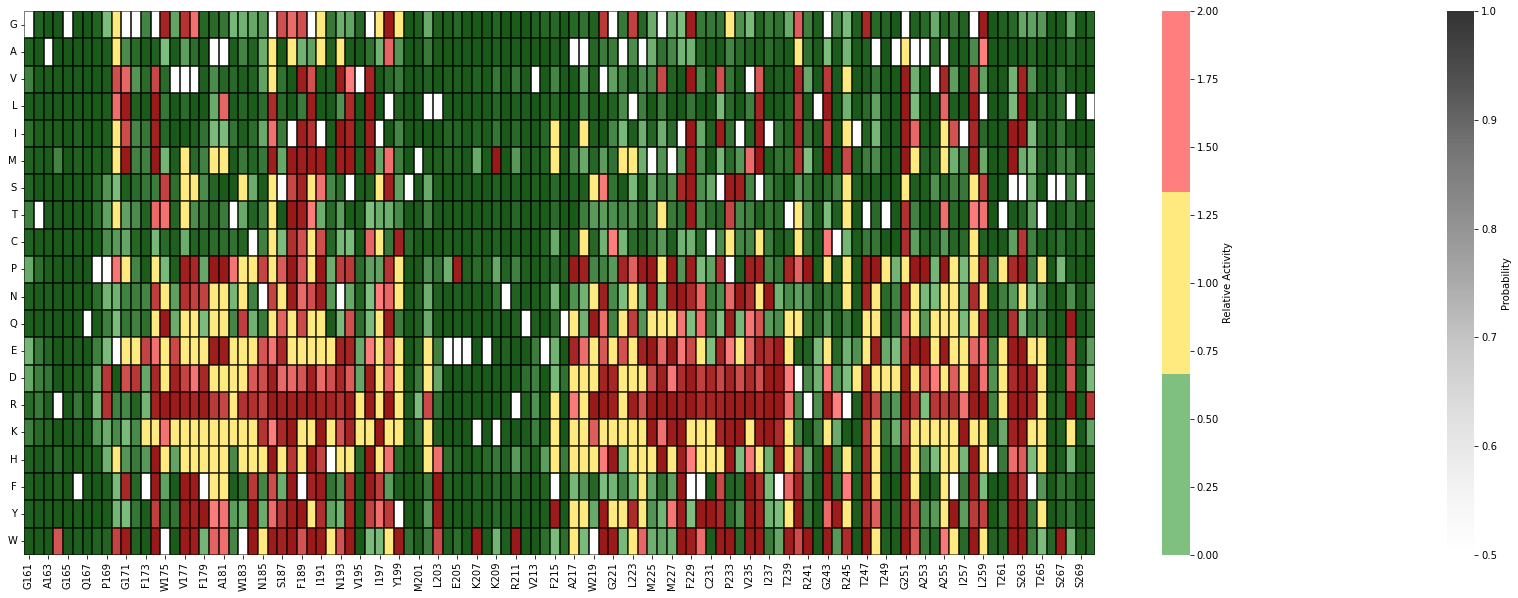

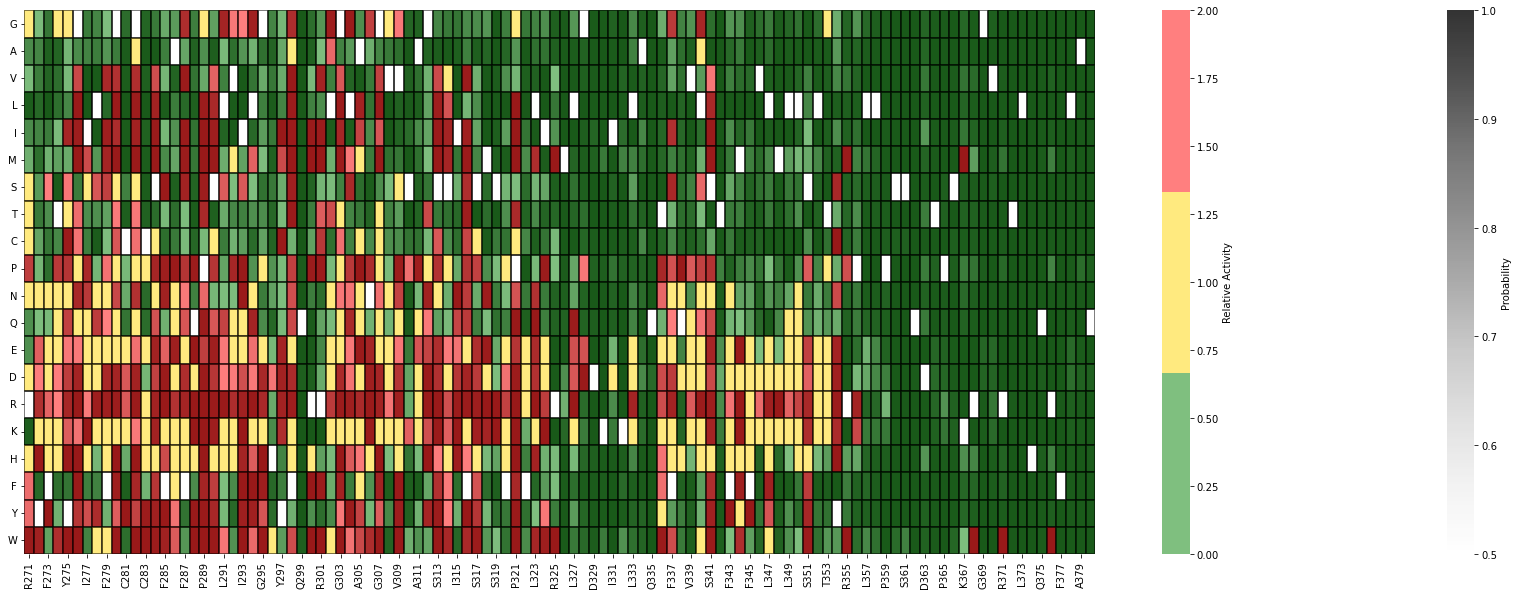

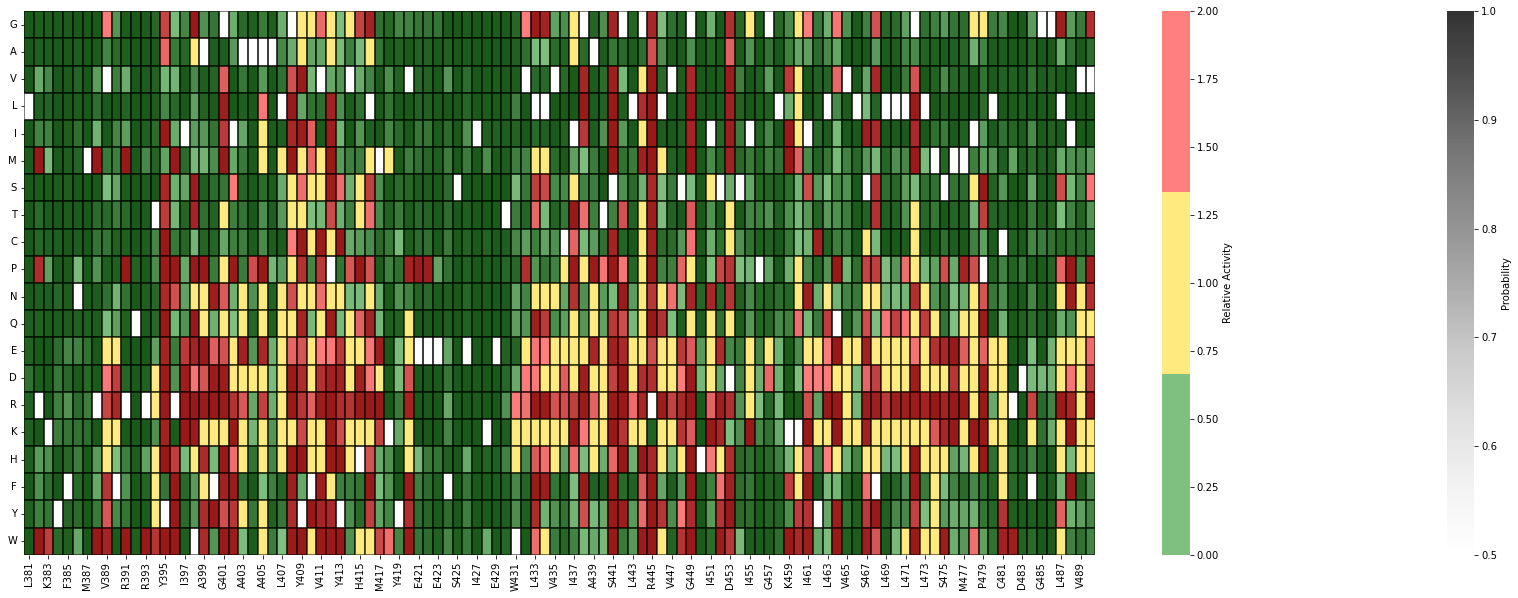

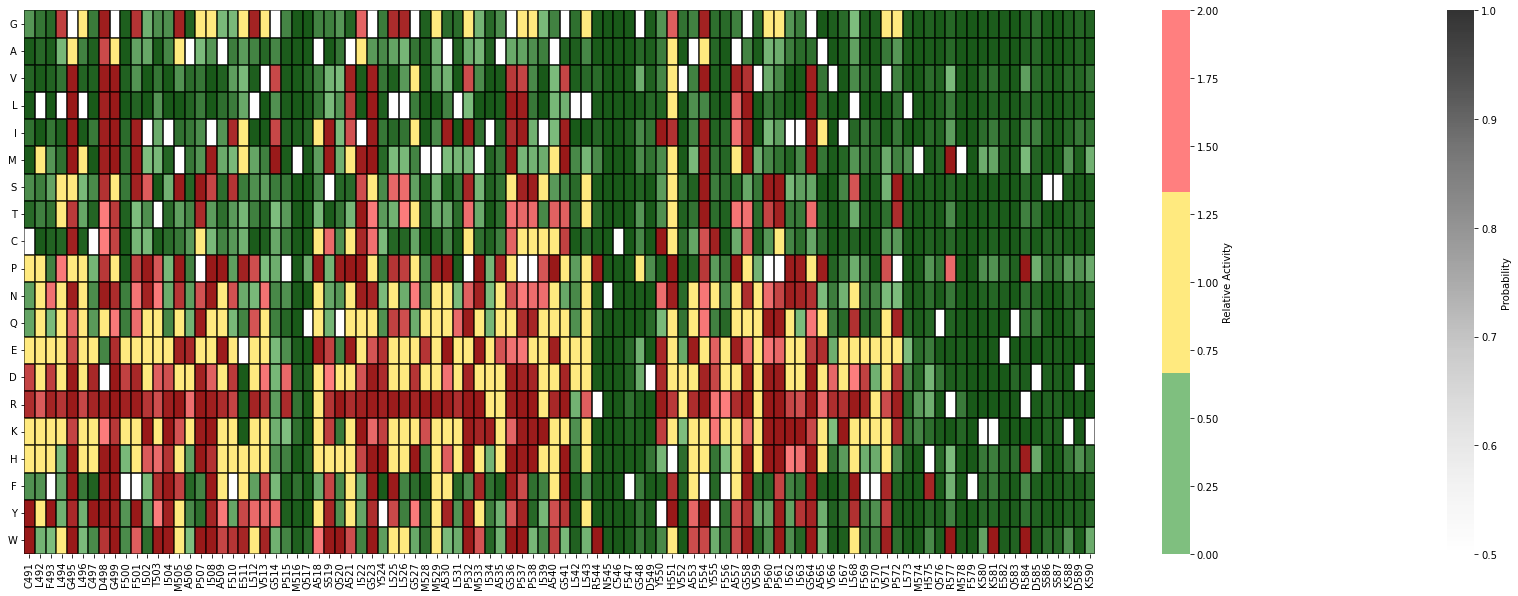

In [45]:
df = pd.read_csv('MCT8_lookupTable_T4.csv', index_col=0)
df.replace({2:1, 3:2}, inplace=True)

from matplotlib import colors
cmap = colors.ListedColormap(['green', 'gold', 'red'])

i = 110
n = 1
while i<550:
    plt.figure(figsize=(30, 10))
    ax_ = sns.heatmap(df_.iloc[:,i-110:i], vmin=0.5, vmax=1, cmap='Greys', alpha=0.8,
                      annot=False, cbar_kws={'label':'Probability'})
    ax = sns.heatmap(df.iloc[:,i-110:i], vmin=0, vmax=2, cmap=cmap, alpha=0.5,  
                     annot=False, linewidths=.01, linecolor='black',
                     cbar_kws={'label':'Relative Activity'})
    plt.yticks(rotation=0)
    plt.ylabel('')
    plt.savefig('MCT8_MutationalLandscape_T4_'+str(n)+'.png')
    n+=1
    i+=110

---

In [46]:
from matplotlib import colors
cmap = colors.ListedColormap(['green', 'gold', 'red'])

mutational_landscape = pd.read_csv('MCT8_mutationallandscape_T4.csv', index_col=0)
df = pd.read_csv('MCT8_lookupTable_T4.csv')
mutational_landscape['REF'] = mutational_landscape.index.str[:-1]
mutational_landscape['ALT'] = mutational_landscape.index.str[-1].astype('category')

mutational_landscape.head()

ResNumber  TMD  ICL  ECL  MembraneFacing  ChannelFacing  Buried  \
Variant                                                                    
G161C          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161E          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161V          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161A          161  0.0  1.0  0.0             0.0            0.0     0.0   
G161W          161  0.0  1.0  0.0             0.0            0.0     0.0   

         MISA_OW  SASA_OW  SCSA_OW  ...  evol_indices_init  evol_indices_mean  \
Variant                             ...                                         
G161C        0.0    33.86      0.0  ...                NaN                NaN   
G161E        0.0    33.86      0.0  ...                NaN                NaN   
G161V        0.0    33.86      0.0  ...                NaN                NaN   
G161A        0.0    33.86      0.0  ...                NaN                NaN   
G161W        0.0    33.86      0.0  ...                NaN                NaN   

         1st_step_prediction  Benign_Probability  Pathogenic_Probability  \
Variant                                                                    
G161C                    0.0            0.961097                0.038903   
G161E                    0.0            0.584755                0.415245   
G161V                    0.0            0.850730                0.149270   
G161A                    0.0            0.961974                0.038026   
G161W                    0.0            0.984665                0.015335   

         2nd_step_prediction  ModerateImpact_Probability  \
Variant                                                    
G161C                    NaN                         NaN   
G161E                    NaN                         NaN   
G161V                    NaN                         NaN   
G161A                    NaN                         NaN   
G161W                    NaN                         NaN   

         SevereImpact_Probability   REF  ALT  
Variant                                       
G161C                         NaN  G161    C  
G161E                         NaN  G161    E  
G161V                         NaN  G161    V  
G161A                         NaN  G161    A  
G161W                         NaN  G161    W  

[5 rows x 143 columns]

In [47]:
ml_plot = mutational_landscape.iloc[:,-8:]

ml_plot.loc[ml_plot['Benign_Probability']>=0.5, '1st_Probability'] = ml_plot['Benign_Probability']
ml_plot.loc[ml_plot['Benign_Probability']<0.5, '1st_Probability'] = ml_plot['Pathogenic_Probability']

ml_plot.loc[ml_plot['ModerateImpact_Probability']>=0.5, '2nd_Probability'] = ml_plot['ModerateImpact_Probability']
ml_plot.loc[ml_plot['ModerateImpact_Probability']<0.5, '2nd_Probability'] = ml_plot['SevereImpact_Probability']

ml_plot["ALT_numbers"] = ml_plot.ALT

In [48]:
ml_plot.ALT_numbers = ml_plot.ALT_numbers.replace({"G":20, "A":19, "V":18, "L":17, "M":16, "I":15, "F":14, 
                                                   "Y":13, "W":12, "K":11, "R":10, "D":9, "E":8, "S":7, 
                                                   "T":6, "C":5, "N":4, "Q":3, "H":2, "P":1})

In [49]:
ml_plot.sort_values(by="ALT_numbers")

1st_step_prediction  Benign_Probability  Pathogenic_Probability  \
Variant                                                                    
V566P                    0.0            0.951387                0.048613   
S236P                    1.0            0.008097                0.991903   
S467P                    1.0            0.071861                0.928139   
Q335P                    0.0            0.987712                0.012288   
R577P                    1.0            0.421961                0.578039   
...                      ...                 ...                     ...   
M326G                    0.0            0.991980                0.008020   
E204G                    0.0            0.977903                0.022097   
F569G                    0.0            0.972616                0.027384   
K332G                    0.0            0.999945                0.000055   
Q375G                    0.0            0.998712                0.001288   

         2nd_step_prediction  ModerateImpact_Probability  \
Variant                                                    
V566P                    NaN                         NaN   
S236P                    3.0                    0.039301   
S467P                    3.0                    0.176767   
Q335P                    NaN                         NaN   
R577P                    3.0                    0.343762   
...                      ...                         ...   
M326G                    NaN                         NaN   
E204G                    NaN                         NaN   
F569G                    NaN                         NaN   
K332G                    NaN                         NaN   
Q375G                    NaN                         NaN   

         SevereImpact_Probability   REF ALT  1st_Probability  2nd_Probability  \
Variant                                                                         
V566P                         NaN  V566   P         0.951387              NaN   
S236P                    0.960699  S236   P         0.991903         0.960699   
S467P                    0.823233  S467   P         0.928139         0.823233   
Q335P                         NaN  Q335   P         0.987712              NaN   
R577P                    0.656238  R577   P         0.578039         0.656238   
...                           ...   ...  ..              ...              ...   
M326G                         NaN  M326   G         0.991980              NaN   
E204G                         NaN  E204   G         0.977903              NaN   
F569G                         NaN  F569   G         0.972616              NaN   
K332G                         NaN  K332   G         0.999945              NaN   
Q375G                         NaN  Q375   G         0.998712              NaN   

         ALT_numbers  
Variant               
V566P              1  
S236P              1  
S467P              1  
Q335P              1  
R577P              1  
...              ...  
M326G             20  
E204G             20  
F569G             20  
K332G             20  
Q375G             20  

[8170 rows x 11 columns]

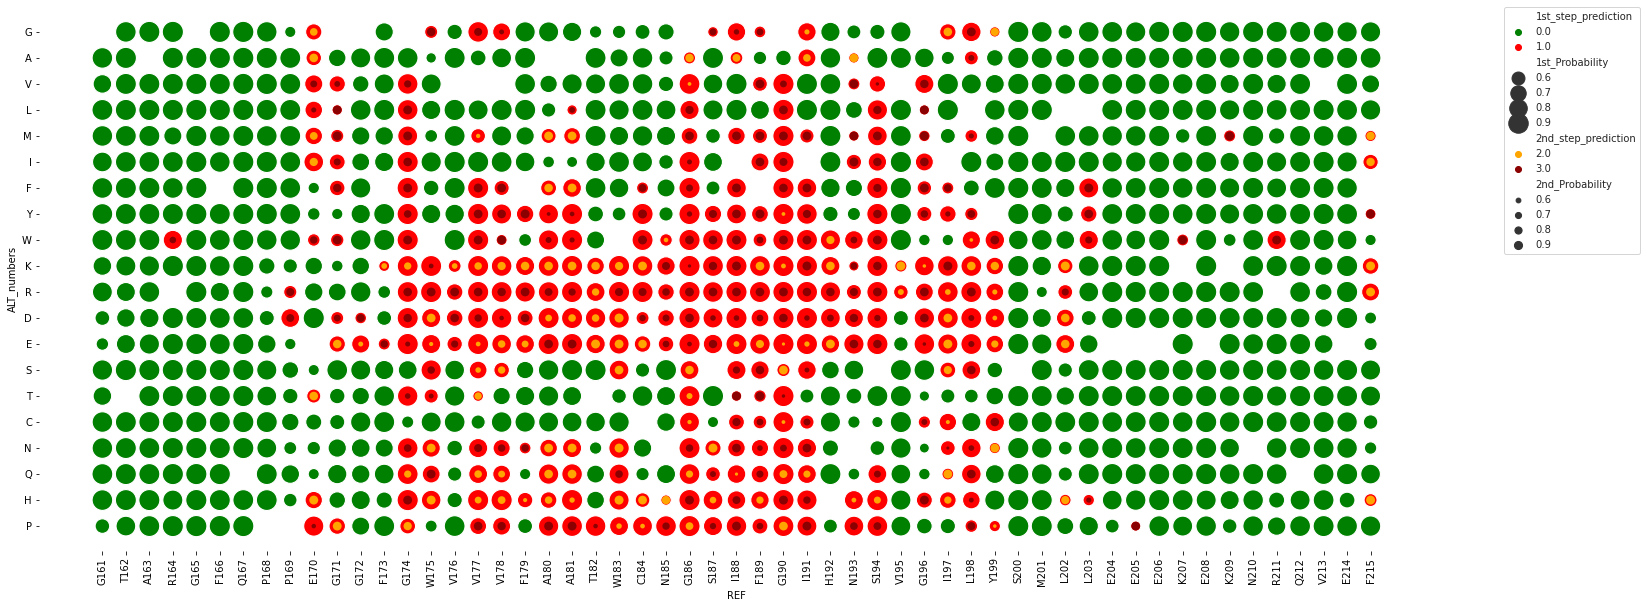

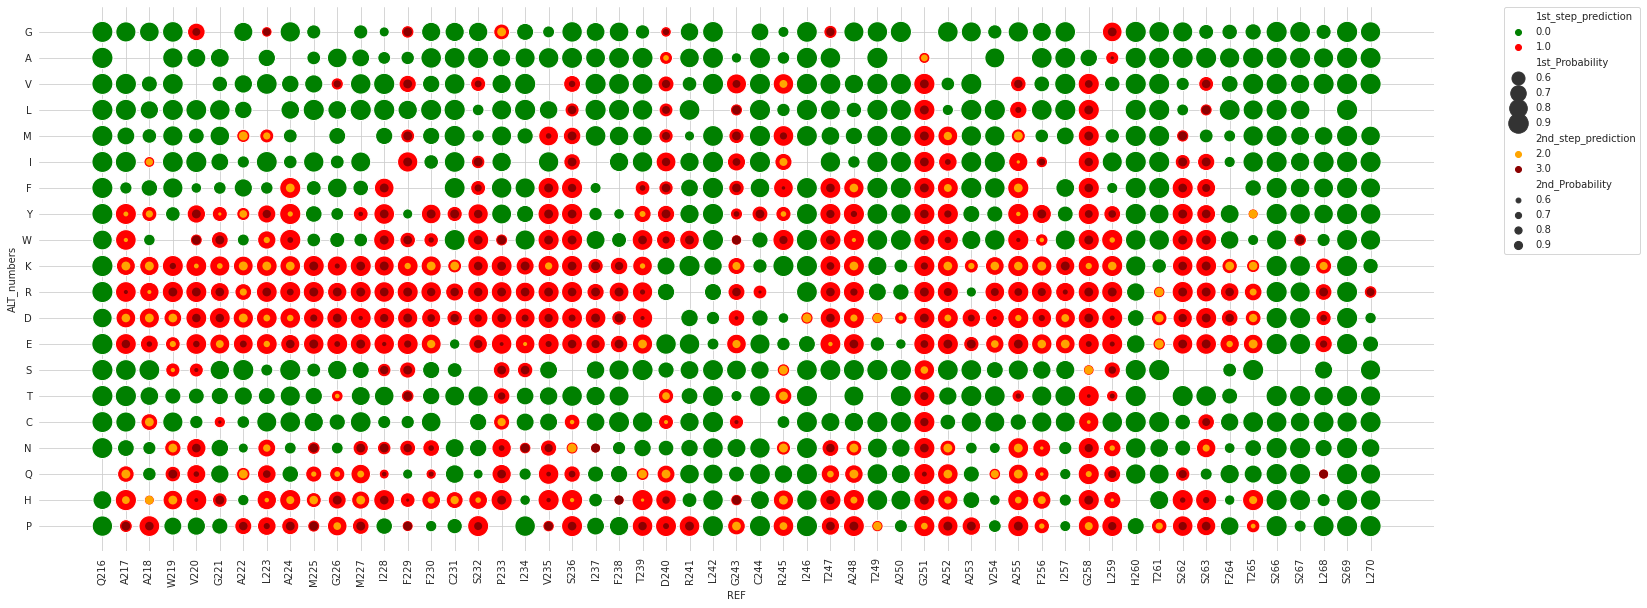

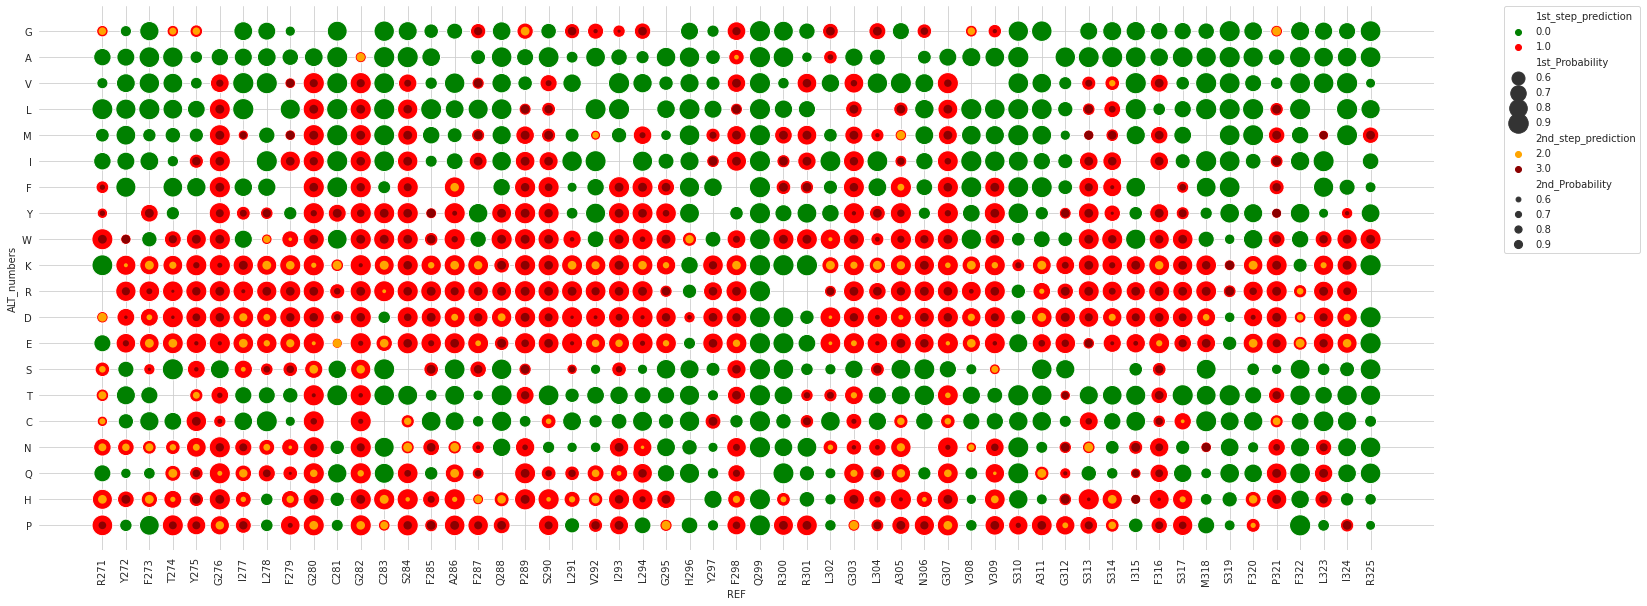

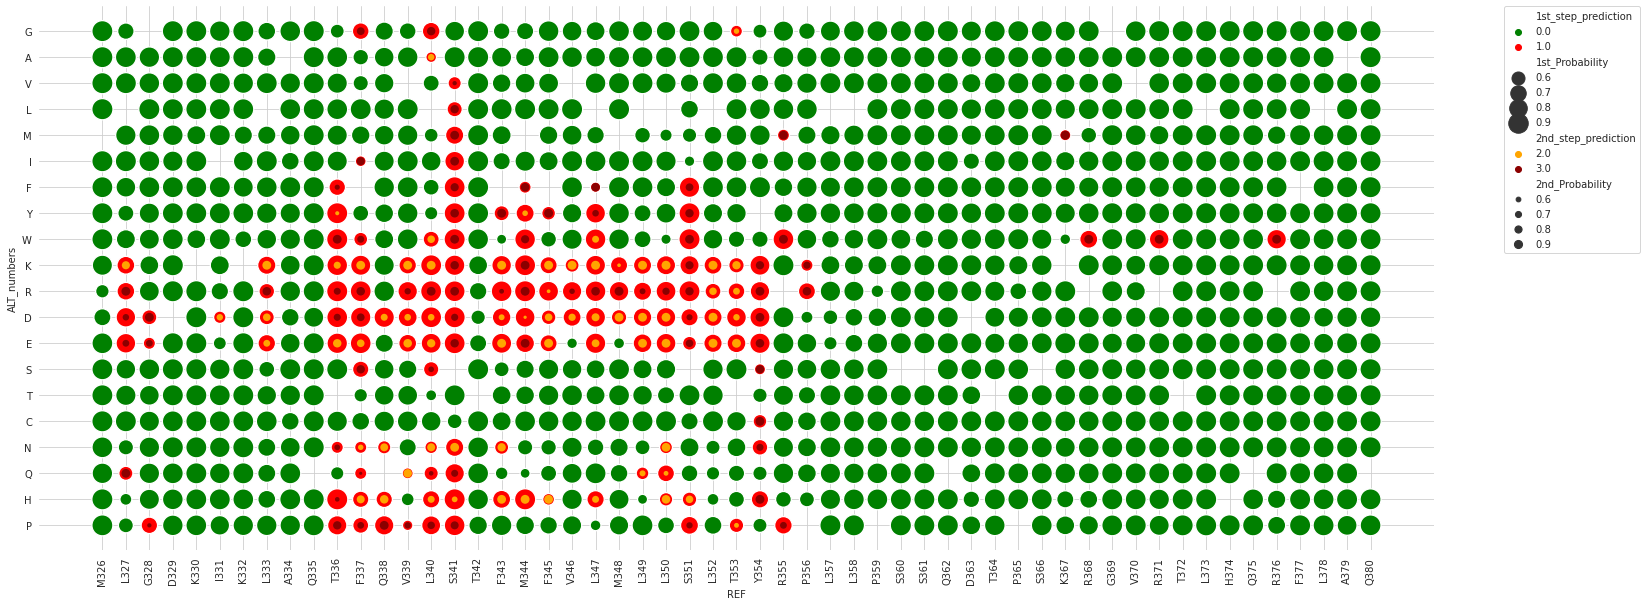

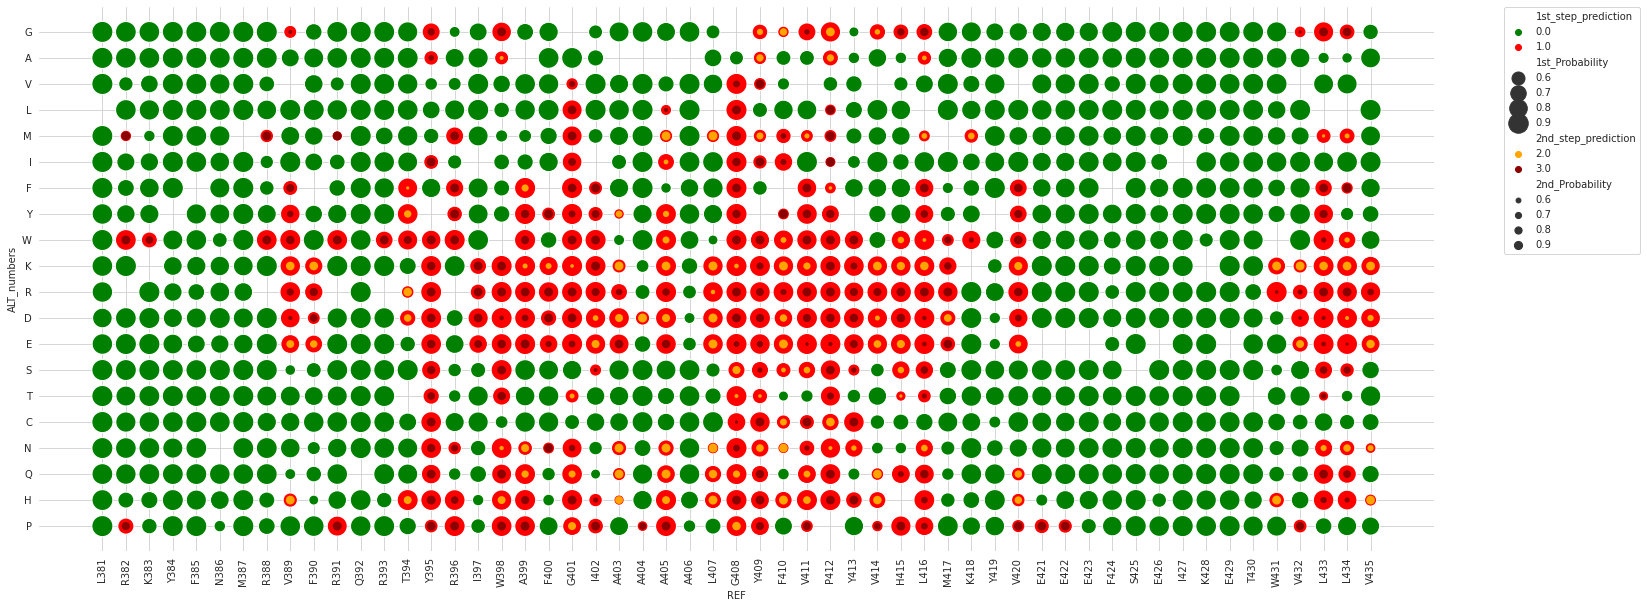

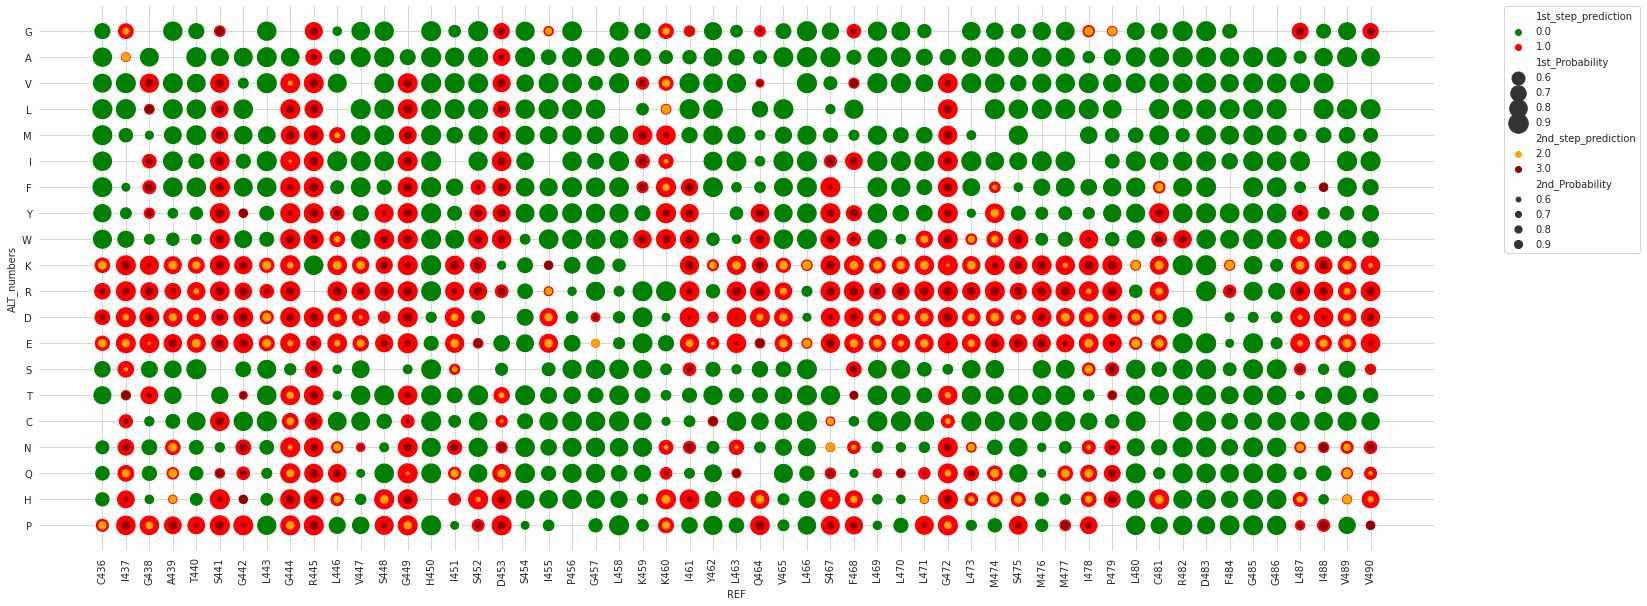

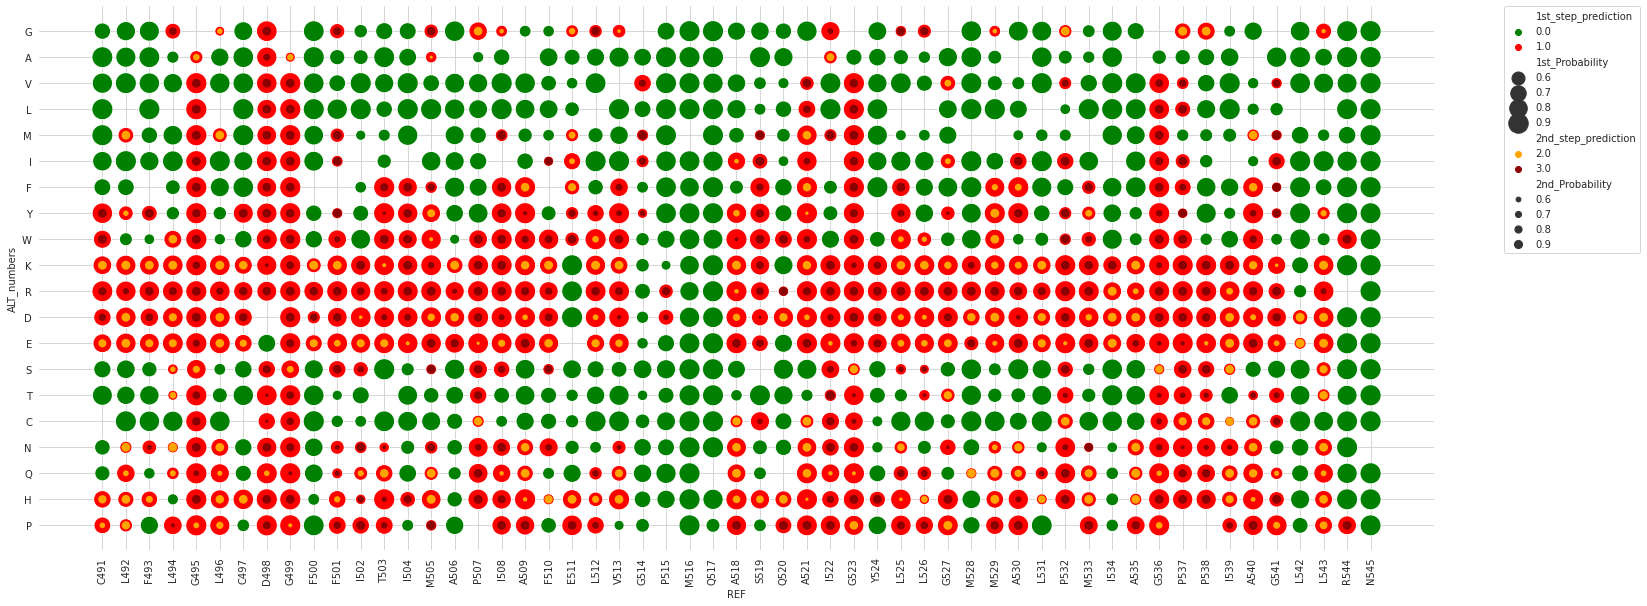

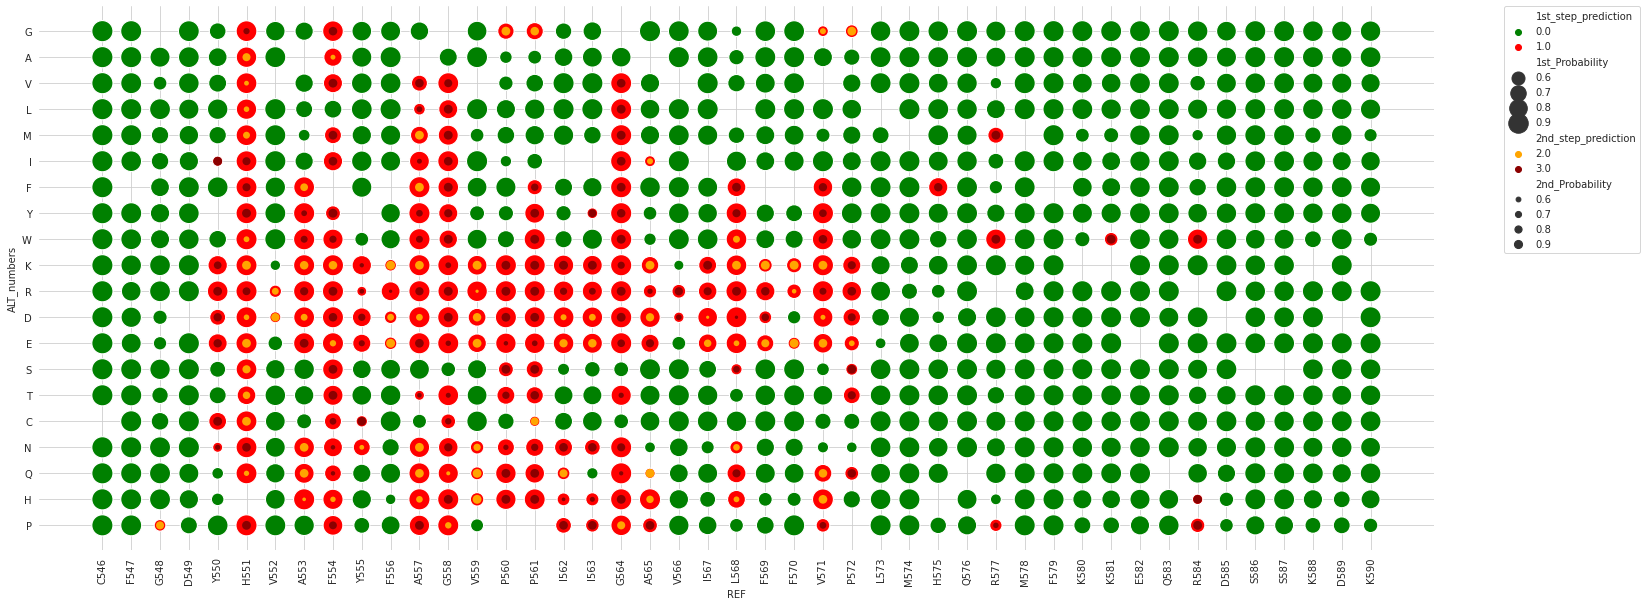

In [50]:
i = 1045
n = 1
while i<8370:
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.set_style("whitegrid")
    sns.scatterplot(data=ml_plot.iloc[i-1045:i,], x='REF', y='ALT_numbers', 
                    hue='1st_step_prediction', size='1st_Probability',
                    sizes=(100, 450), palette=['green', 'red'], ax=ax)
    sns.scatterplot(data=ml_plot.iloc[i-1045:i], x='REF', y='ALT_numbers', 
                    hue='2nd_step_prediction', size='2nd_Probability',
                    sizes=(10, 80), palette=['orange', 'darkred'], 
                    marker='o', linewidth=0.01, ax=ax)
    plt.xticks(rotation=90)
    plt.yticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               labels=['P', 'H', 'Q', 'N', 'C', 'T', 'S', 'E', 'D', 'R', 'K', 'W', 'Y', 'F',
                       'I', 'M', 'L', 'V', 'A', 'G'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.spines['left'].set_color('white')
    sns.despine(left=True, bottom=True)
    plt.savefig('MCT8_CircularMutationalLandscape_T4_'+str(n)+'.png')
    plt.show()
    i += 1045
    n += 1

### which are the differential features of each group?

In [51]:
# Benign vs Pathogenic
mct8 = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
mct8.set_index('AA_change', inplace=True)

selected_features_1 = ['MDS_OW', 'GEOD900101', 'DAYM780301', 'LINK010101', 'FoldX_ddG_AF_OW', 'evol_indices_mean',
                       'TMD', 'ICL', 'ECL']

mct8.loc[mct8['Activity'] > 75, 'ClinSig'] = 0
mct8.loc[(mct8['Activity'] <= 75) & (mct8['Activity'] > 10), 'ClinSig'] = 1
mct8.loc[mct8['Activity'] <= 10, 'ClinSig'] = 2

step1 = mct8.loc[:, ['ClinSig']+selected_features_1]
step1.ClinSig.replace({0:'Benign', 1:'Pathogenic', 2:'Pathogenic'}, inplace=True)
step1

ClinSig  MDS_OW  GEOD900101  DAYM780301  LINK010101  \
AA_change                                                           
Pro169Ala      Benign  30.152         9.0         1.0       0.056   
Pro233Ala  Pathogenic  20.400         9.0         1.0       0.056   
Pro289Ala  Pathogenic  18.950         9.0         1.0       0.056   
Pro321Ala      Benign  11.753         9.0         1.0       0.056   
Pro356Ala  Pathogenic  29.998         9.0         1.0       0.056   
...               ...     ...         ...         ...         ...   
Asp498Asn  Pathogenic   8.887         6.0         2.0       0.070   
Met476Ile      Benign  19.400         9.0         2.0       0.092   
Val489Asp  Pathogenic  20.215         4.0        -2.0       0.011   
Ala553Asp  Pathogenic  16.452         5.0         0.0       0.033   
Ala553Asn  Pathogenic  16.452         9.0         0.0       0.020   

           FoldX_ddG_AF_OW  evol_indices_mean  TMD  ICL  ECL  
AA_change                                                     
Pro169Ala              2.3           4.504437  0.0  1.0  0.0  
Pro233Ala              2.6           5.533997  1.0  0.0  0.0  
Pro289Ala              3.0           5.583874  1.0  0.0  0.0  
Pro321Ala              2.5           5.110223  1.0  0.0  0.0  
Pro356Ala              1.7           6.504669  0.0  1.0  0.0  
...                    ...                ...  ...  ...  ...  
Asp498Asn              2.5           7.997272  1.0  0.0  0.0  
Met476Ile              0.8           1.793298  1.0  0.0  0.0  
Val489Asp              0.2           9.454669  1.0  0.0  0.0  
Ala553Asp              3.4           9.531854  1.0  0.0  0.0  
Ala553Asn              7.3           9.190918  1.0  0.0  0.0  

[480 rows x 10 columns]

In [52]:
step1_numerical = ['MDS_OW', 'GEOD900101', 'DAYM780301', 'LINK010101', 'FoldX_ddG_AF_OW', 'evol_indices_mean']
step1_categorical = ['TMD', 'ICL', 'ECL']

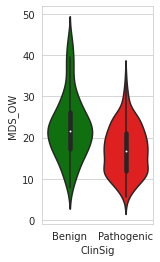

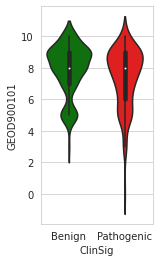

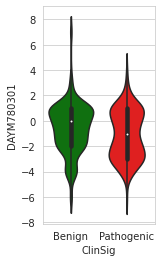

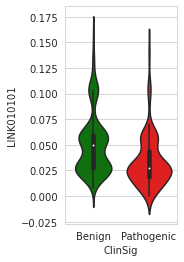

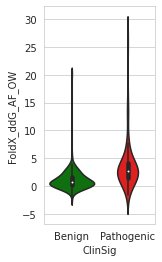

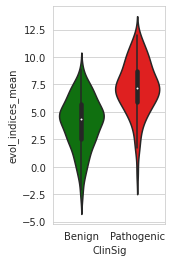

In [53]:
for y in step1_numerical:
    plt.figure(figsize=(2,4))
    sns.violinplot(data=step1, x="ClinSig", y=y, capsize=.2, palette=['green', 'red'], 
                   scale='area', inner='box')
    plt.savefig(y+'_T4_step1.jpg', bbox_inches='tight')
    plt.show()

<Figure size 144x288 with 0 Axes>

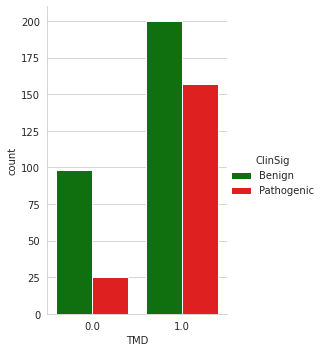

<Figure size 144x288 with 0 Axes>

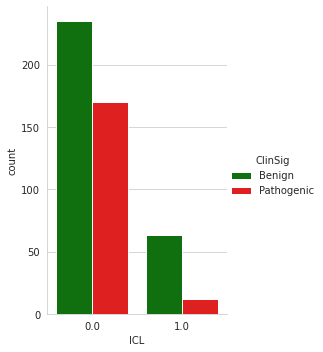

<Figure size 144x288 with 0 Axes>

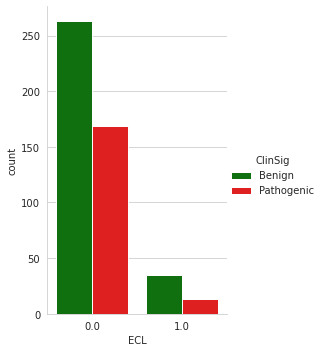

In [54]:
for x in step1_categorical:
    plt.figure(figsize=(2,4))
    sns.catplot(data=step1, kind='count', x=x, hue='ClinSig', palette=['green', 'red'], aspect=.7)    
    plt.savefig(x+'_T4_step1.jpg', bbox_inches='tight')
    plt.show()

In [55]:
# Moderate vs severe
selected_features_2 = ['MISA_OW', 'SCSA_OW', 'MISA_IW', 'CS1', 'MEHP950101', 'OVEJ920103', 'FEND850101',
                       'LUTR910107', 'FITW660101', 'JOHM930101', 'MOHR870101', 'KOSJ950107', 'CSEM940101',
                       'DOSZ010103', 'KOSJ950101', 'GIAG010101', 'KOSJ950114', 'SIS', 'evol_indices_mean',
                       'TMD', 'SubstrateInteraction', 'HelixStructure']

step2 = mct8.loc[:, ['ClinSig']+selected_features_2]
step2 = step2[step2.ClinSig != 0]
step2.ClinSig.replace({1:'Moderate', 2:'Severe'}, inplace=True)
step2.rename(columns={'ClinSig': 'Impact'}, inplace=True)
step2.tail()

Impact  MISA_OW  SCSA_OW  MISA_IW    CS1  MEHP950101  OVEJ920103  \
AA_change                                                                       
Asp453Asn    Severe     0.00     0.00     0.00 -0.994        1.08       0.095   
Asp498Asn    Severe     0.00    28.28     0.00 -0.838        1.08       0.095   
Val489Asp  Moderate    19.22     0.00    44.47 -0.394        1.01       0.058   
Ala553Asp  Moderate     0.00     0.00     0.00 -0.769        1.31       0.025   
Ala553Asn  Moderate     0.00     0.00     0.00 -0.769        1.28       0.041   

           FEND850101  LUTR910107  FITW660101  ...  CSEM940101  DOSZ010103  \
AA_change                                      ...                           
Asp453Asn         5.0         5.0         1.0  ...        0.56         2.2   
Asp498Asn         5.0         5.0         1.0  ...        0.56         2.2   
Val489Asp         3.0        -7.0         1.0  ...       -0.48        -5.9   
Ala553Asp         4.0         2.0         1.0  ...       -0.08        -2.8   
Ala553Asn         3.0         2.0         2.0  ...       -0.14        -1.2   

           KOSJ950101  GIAG010101  KOSJ950114     SIS  evol_indices_mean  TMD  \
AA_change                                                                       
Asp453Asn         7.3         1.3         3.0   0.000           6.415308  1.0   
Asp498Asn         7.3         1.3         3.0  26.315           7.997272  1.0   
Val489Asp         0.1        -0.1         0.2   0.000           9.454669  1.0   
Ala553Asp         0.7        -1.0         0.6   0.000           9.531854  1.0   
Ala553Asn         1.0         0.5         0.5   0.000           9.190918  1.0   

           SubstrateInteraction  HelixStructure  
AA_change                                        
Asp453Asn                   0.0             1.0  
Asp498Asn                   1.0             0.0  
Val489Asp                   0.0             0.0  
Ala553Asp                   0.0             0.0  
Ala553Asn                   0.0             0.0  

[5 rows x 23 columns]

In [56]:
step2_numerical = ['MISA_OW', 'SCSA_OW', 'MISA_IW', 'CS1', 'MEHP950101', 'OVEJ920103', 'FEND850101',
                   'LUTR910107', 'FITW660101', 'JOHM930101', 'MOHR870101', 'KOSJ950107', 'CSEM940101',
                   'DOSZ010103', 'KOSJ950101', 'GIAG010101', 'KOSJ950114', 'SIS', 'evol_indices_mean']
                    
step2_categorical = ['TMD', 'SubstrateInteraction', 'HelixStructure']

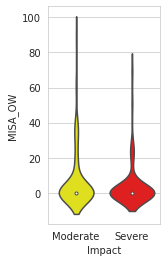

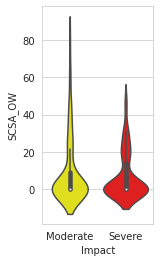

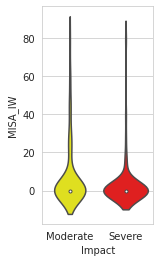

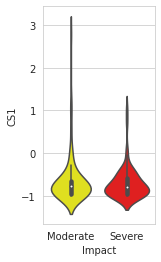

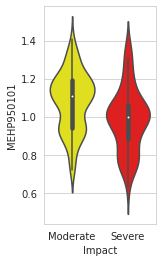

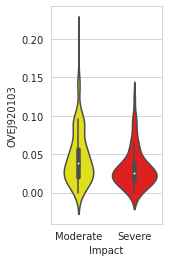

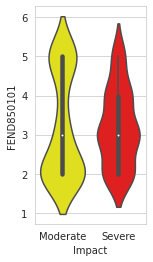

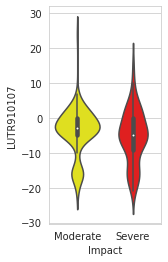

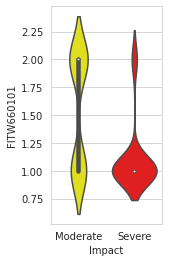

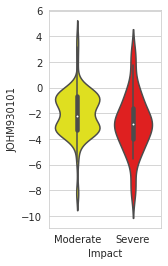

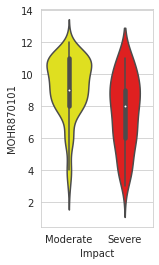

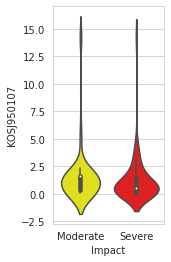

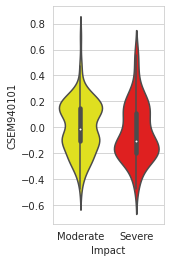

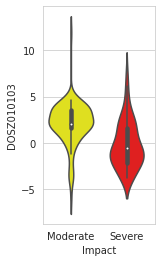

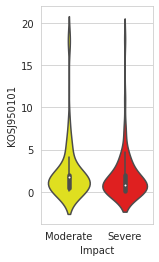

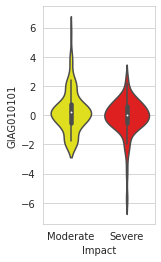

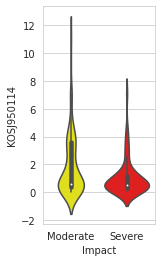

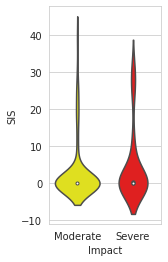

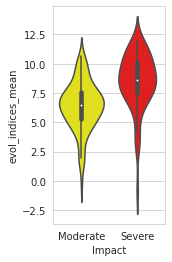

In [57]:
for y in step2_numerical:
    plt.figure(figsize=(2,4))
    sns.violinplot(data=step2, x="Impact", y=y, capsize=.2, palette=['yellow', 'red'], 
                   scale='area', inner='box')
    plt.savefig(y+'_T4_step2.jpg', bbox_inches='tight')
    plt.show()

<Figure size 144x288 with 0 Axes>

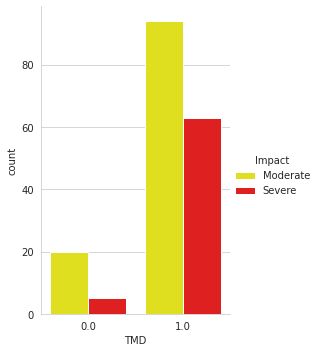

<Figure size 144x288 with 0 Axes>

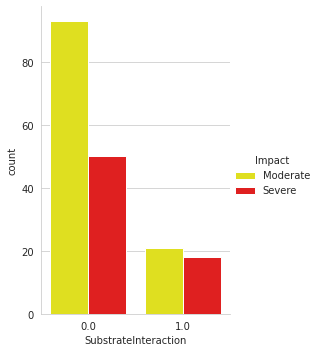

<Figure size 144x288 with 0 Axes>

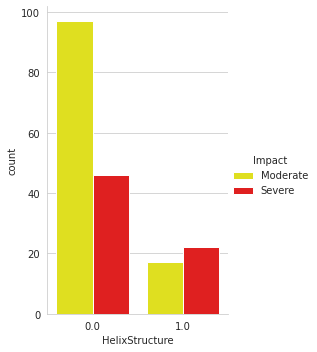

In [58]:
for x in step2_categorical:
    plt.figure(figsize=(2,4))
    sns.catplot(data=step2, kind='count', x=x, hue='Impact', palette=['yellow', 'red'], aspect=.7)    
    plt.savefig(x+'_T4_step2.jpg', bbox_inches='tight')
    plt.show()

/home/mariano/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


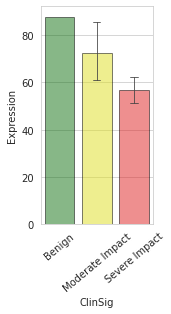

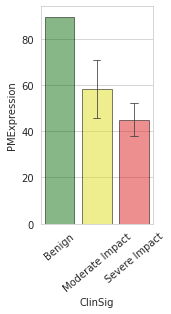

In [59]:
expression = mct8[['ClinSig','Expression', 'PMExpression']]
expression.replace({0:'Benign', 1:'Moderate Impact', 2:'Severe Impact'}, inplace=True)
for y in expression.columns:
    if y != 'ClinSig':
        plt.figure(figsize=(2,4))
        sns.barplot(data=expression, x='ClinSig', y=y, capsize=.2, 
                    palette=['green','yellow', 'red'], edgecolor='black',
                    alpha=0.5, errwidth=.8)
        plt.xticks(rotation=40)
        plt.axhline(0, color='black', linestyle='-', alpha=0.7, linewidth=.8)
        plt.savefig('Variants'+y+'_T4.jpg', bbox_inches='tight')
        plt.show()